<img src="https://drive.google.com/uc?id=1SOzRTjUt7cuBJpSqoK90fcAiKBrnpUJo" width="400">
<br>
<b>
<font size="6" face="arial" color="blue">
    MBA em Ciência de Dados
</font>
</b>
<br>
<b>
<font size="3" face="arial">
    Disciplina: Introdução ao Aprendizado de Máquina
</font>
</b>

Turma - 8

Professor: Erneson A. Oliveira

Aluno: João Paulo Barbosa Amorim Leitão

Matrícula: 2418549



# Quadro geral:

Dataset: Base histórica da liga de basquete americana (NBA).

Objetivo do projeto:
   * Determinar a resposta para a pergunta:
    **Qual é/foi o jogador mais superfaturado da NBA?**


Para isso, será determinada a performance de um jogador, e estabelecida a relação entre salário e performance.

A performance será determinada a partir da soma ponderada dos valores de diversas métricas do jogador.







# 1 - Obter os dados
Baixe os Dados:

https://drive.google.com/file/d/1FC6kMp0WWSi61S_Mi0r9wSSbuYkqZid2/view?usp=sharing

In [116]:
!gdown 1FC6kMp0WWSi61S_Mi0r9wSSbuYkqZid2

Downloading...
From: https://drive.google.com/uc?id=1FC6kMp0WWSi61S_Mi0r9wSSbuYkqZid2
To: /content/nba_stats.csv
100% 3.50M/3.50M [00:00<00:00, 285MB/s]


In [117]:
import pandas as pd

# Carregar os dados do arquivo CSV
stats_df = pd.read_csv('/content/nba_stats.csv')


# 2 - Descobrir e visualizar os dados

In [118]:
# Exibir as primeiras linhas do DataFrame
stats_df.head()

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"


In [119]:
# Resumo dos atributos numéricos

stats_df.describe()

,year,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,rankingSalary
count,8162.000000,8.162000e+03,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000
mean,2012.214776,8.666390e+05,57.978804,22.519525,1.962077,0.297599,2.159642,0.145430,5.431144,0.172507,1427.222985,254.603774,121.683778,4.022146,9.520022,3.541030,7.794584,45.016741,0.733632,2.062167,26.508512,1.704331,2.245933,72.610135,2.077955,1.296104,611.716614,227.427836,497.336560,46.650576,129.835212,110.210365,144.387405,133.548395,81.996815,0.706763,0.463943,44.879441,29.252022,210.610512
std,6.701035,1.517331e+06,21.756214,9.478818,0.750375,0.653207,3.217839,0.446963,10.202230,1.263530,852.746857,198.263379,68.497349,2.525045,6.172618,2.227449,4.740203,7.919343,0.771699,2.019911,16.467585,1.490691,1.844255,15.836810,1.916022,0.816477,478.048933,173.776186,372.424022,54.275904,142.367073,109.945917,137.447434,139.569406,63.099111,0.437720,0.486103,34.028145,34.792868,140.763132
min,1999.000000,2.000000e+00,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2007.000000,9.290000e+02,46.000000,15.097222,1.446808,0.000000,0.000000,0.000000,0.000000,0.000000,713.000000,108.000000,69.000000,2.181818,4.759444,1.820357,4.083334,41.111000,0.022998,0.145161,16.666667,0.661972,0.933333,67.246248,0.737802,0.690976,226.000000,86.000000,193.250000,1.000000,6.000000,31.000000,44.250000,35.000000,33.000000,0.383562,0.147059,18.000000,7.000000,90.000000
50%,2013.000000,3.045500e+03,64.000000,22.769346,1.972222,0.000000,1.000000,0.000000,1.000000,0.000000,1441.500000,217.000000,123.000000,3.458333,8.231238,3.109673,6.836022,44.517500,0.524590,1.629630,32.446808,1.256757,1.712329,75.800003,1.444444,1.111111,521.000000,196.000000,431.000000,26.000000,82.000000,77.000000,104.000000,88.000000,69.000000,0.634146,0.307692,39.000000,18.000000,192.000000
75%,2018.000000,2.451037e+06,76.000000,30.448024,2.486486,0.000000,3.000000,0.000000,6.000000,0.000000,2096.750000,350.000000,172.000000,5.229730,13.000000,4.870963,10.698391,48.616499,1.206643,3.375000,37.254903,2.271368,3.000000,82.158003,2.792683,1.731707,885.750000,332.000000,725.000000,78.000000,218.000000,154.000000,203.000000,185.000000,118.000000,0.946429,0.597170,64.000000,38.000000,321.000000
max,2023.000000,4.997528e+06,85.000000,43.700000,6.000000,9.000000,41.000000,7.000000,69.000000,42.000000,3485.000000,1247.000000,371.000000,16.333334,36.128204,12.225000,27.816668,100.000000,5.349206,13.179487,100.000000,10.176471,12.253968,100.000000,11.738461,5.728395,2832.000000,978.000000,2173.000000,402.000000,1028.000000,756.000000,916.000000,925.000000,464.000000,2.885246,3.913044,225.000000,307.000000,676.000000


## Exibir colunas


In [120]:
print("\n\n\nExibir colunas \n")
print(stats_df.columns)  # Correção: adicione print() para mostrar as colunas




Exibir colunas 

Index(['year', 'name', 'playerId', 'playerSlug', 'positionId', 'teamId',
       'status', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'position', 'birthdate', 'college', 'draftinfo',
       'birthplace', 'team', 'htwt', 'experience', 'rankingSalary', 'salary'],
      dtype='object')


## Quantidade de valores ausentes em cada coluna do dataframe

In [121]:
stats_df.isnull().sum()

,0
year,0
name,0
playerId,0
playerSlug,0
positionId,6
teamId,0
status,0
gamesPlayed,0
avgMinutes,0
avgFouls,0


## Quantidade de registros não nulos e seus tipos

In [122]:
print(" \n\n\n Contagem de registros não nulos e seus tipos")
stats_df.info()

 


 Contagem de registros não nulos e seus tipos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls     

## Resumo estatístico

In [123]:
# Resumo estatístico
print(" \n\n\n Resumo estatístico")
print(stats_df.describe())

 


 Resumo estatístico
              year      playerId  gamesPlayed   avgMinutes     avgFouls  \
count  8162.000000  8.162000e+03  8162.000000  8162.000000  8162.000000   
mean   2012.214776  8.666390e+05    57.978804    22.519525     1.962077   
std       6.701035  1.517331e+06    21.756214     9.478818     0.750375   
min    1999.000000  2.000000e+00     1.000000     0.666667     0.000000   
25%    2007.000000  9.290000e+02    46.000000    15.097222     1.446808   
50%    2013.000000  3.045500e+03    64.000000    22.769346     1.972222   
75%    2018.000000  2.451037e+06    76.000000    30.448024     2.486486   
max    2023.000000  4.997528e+06    85.000000    43.700000     6.000000   

       flagrantFouls  technicalFouls    ejections  doubleDouble  tripleDouble  \
count    8162.000000     8162.000000  8162.000000   8162.000000   8162.000000   
mean        0.297599        2.159642     0.145430      5.431144      0.172507   
std         0.653207        3.217839     0.446963     10.

## Visualização de distribuições

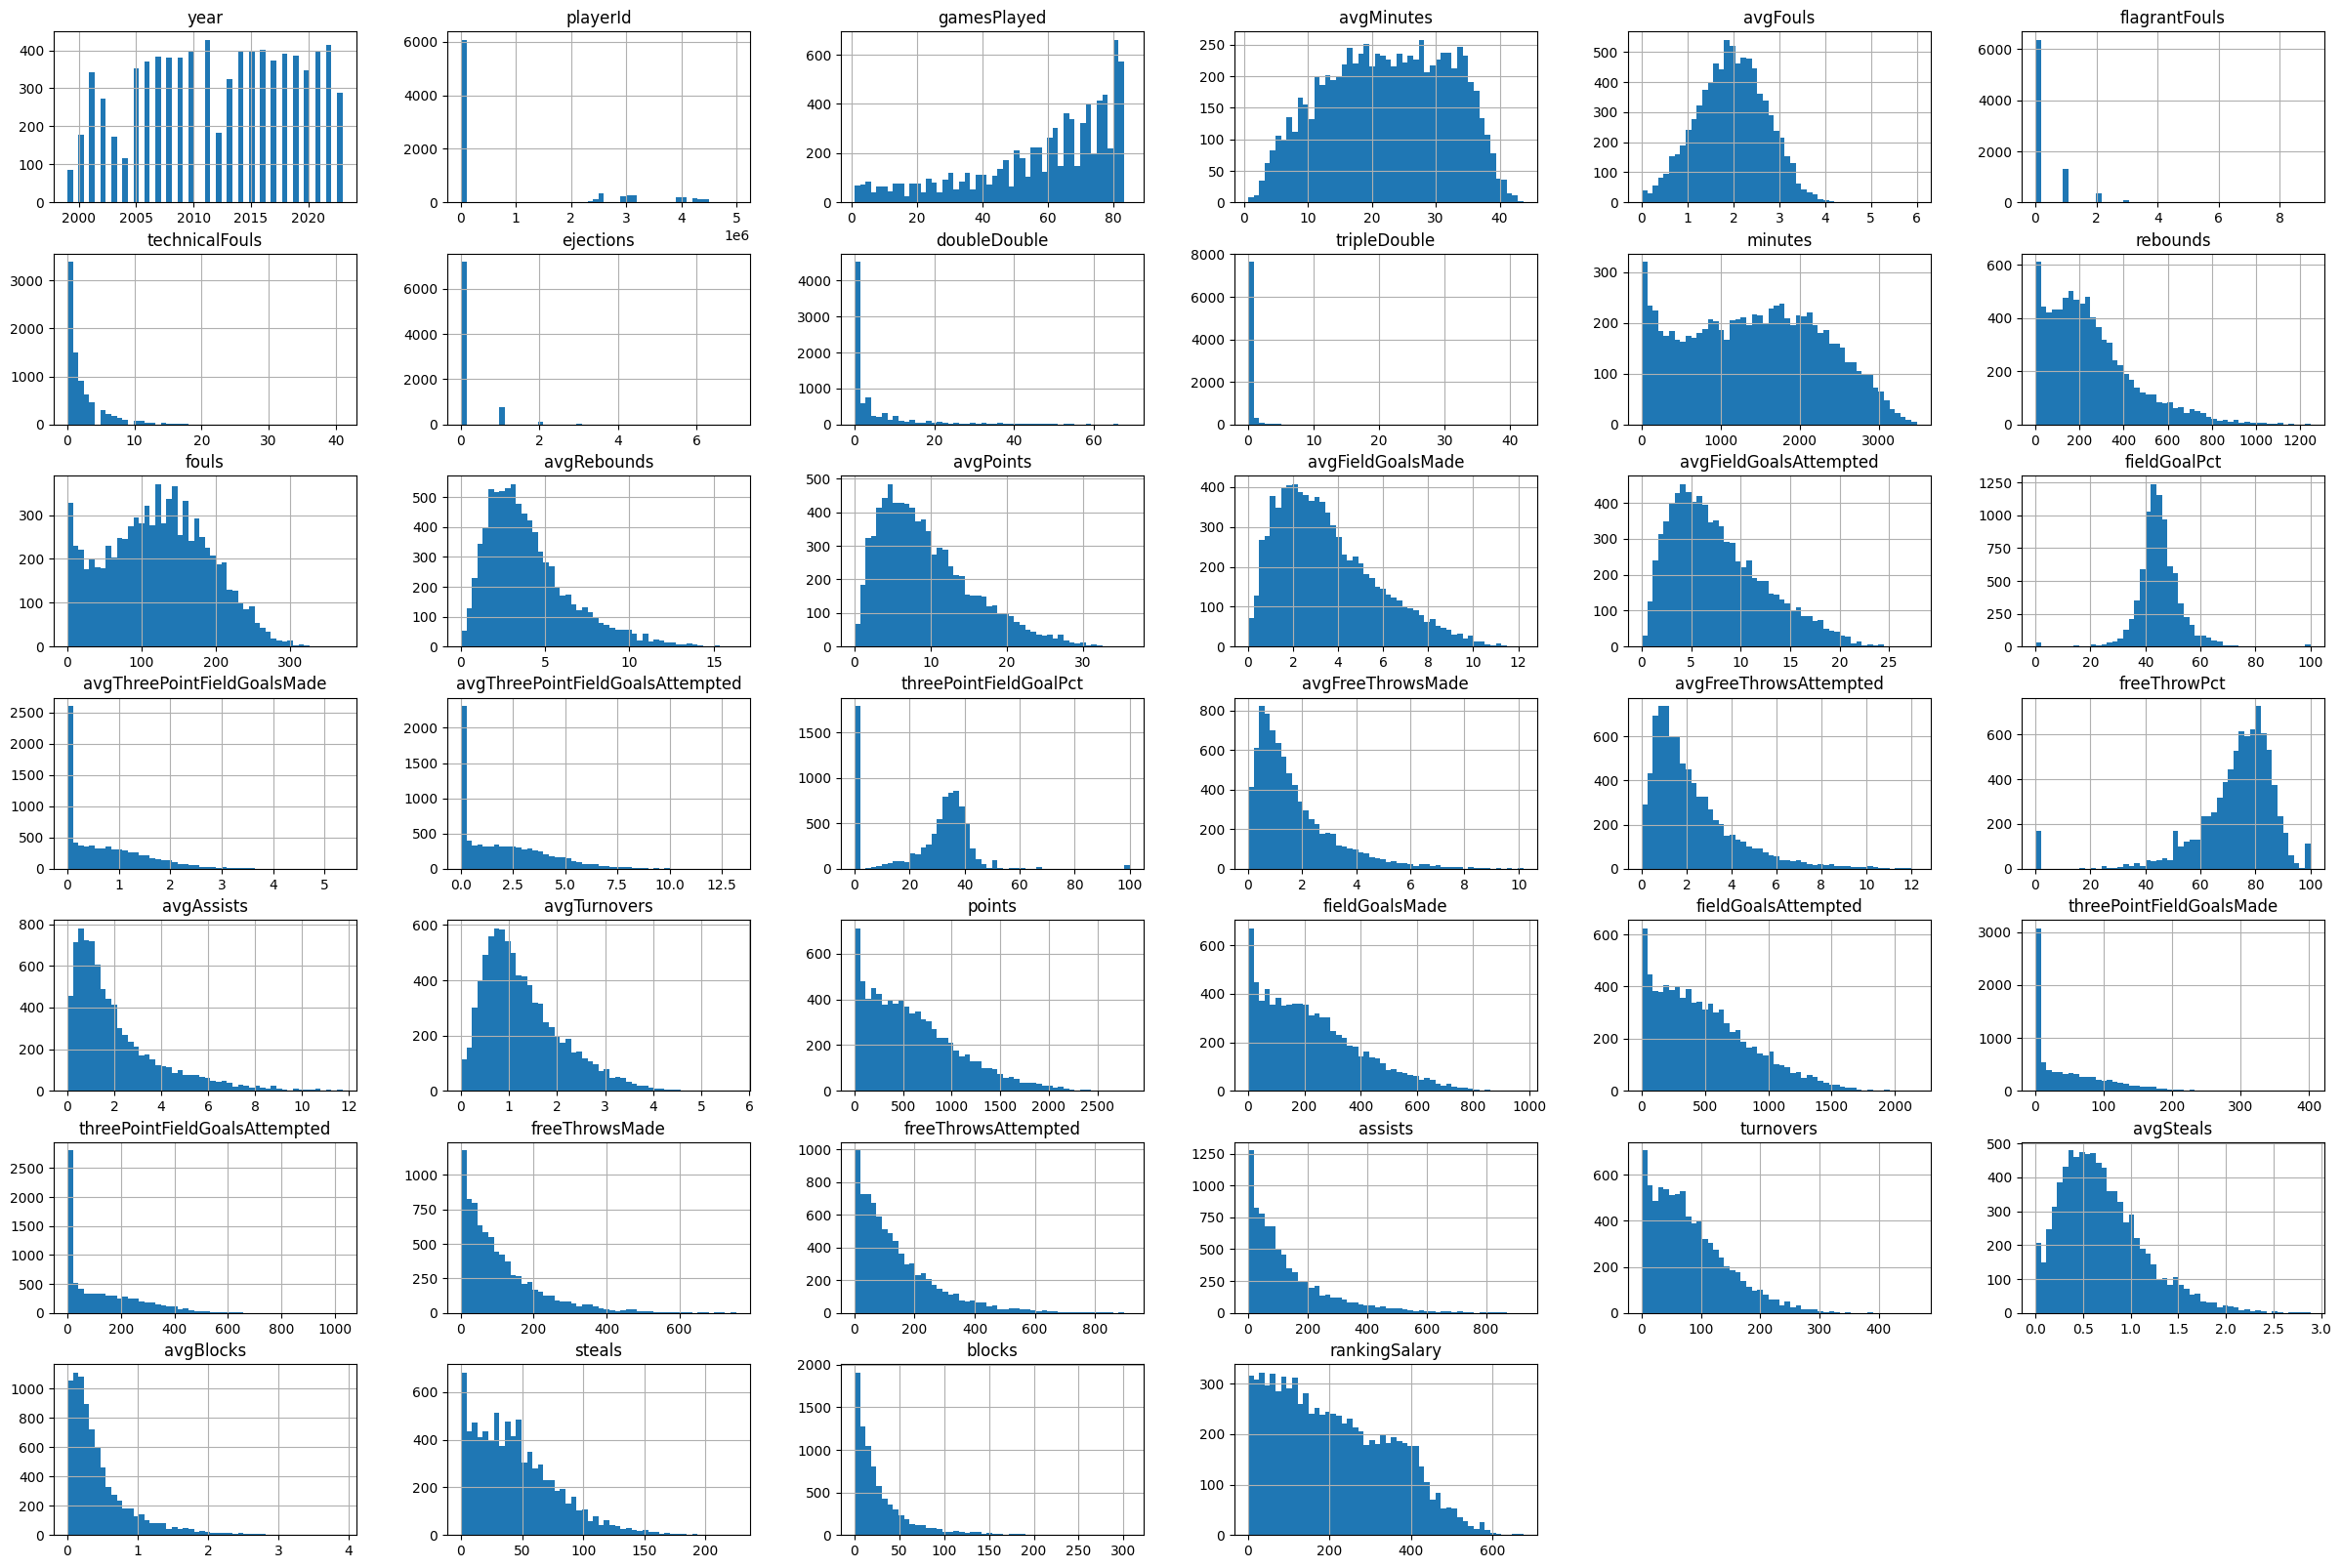

In [124]:
import matplotlib.pyplot as plt
stats_df.hist(bins=50, figsize=(30, 20))
plt.show()

### Copiar dataframe para dataframe de desenvolvimento

In [125]:
df = stats_df.copy()

### Histograma de Salários

In [126]:
# Converter coluna "salary" para numeric
df['salary'] = df['salary'].replace('[\$,]', '', regex=True).astype(float)


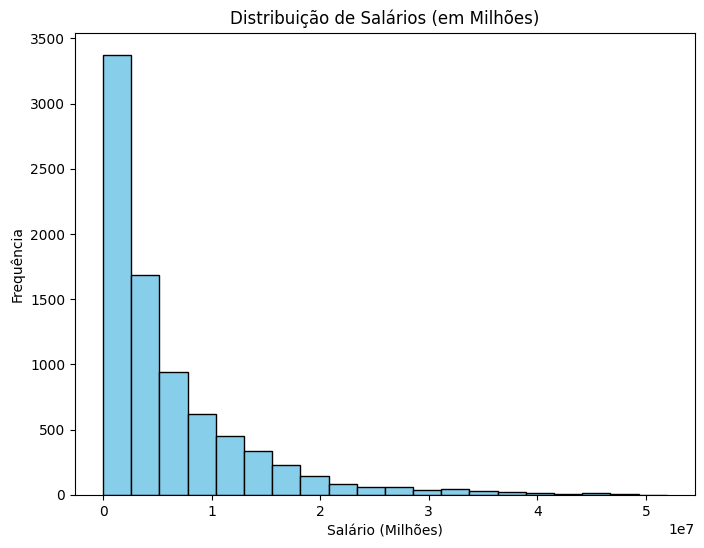

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['salary'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Salários (em Milhões)')
plt.xlabel('Salário (Milhões)')
plt.ylabel('Frequência')
plt.show()


### Identificar Outliers

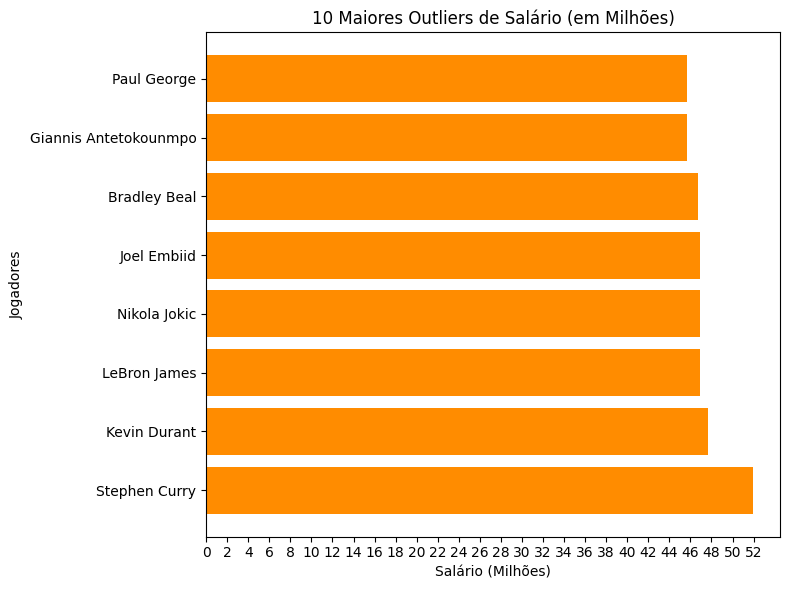

In [128]:
import matplotlib.pyplot as plt

# Função para identificar outliers estatísticos
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identificar os outliers na coluna 'salary'
outliers_salary = identify_outliers(df, 'salary')

# Selecionar os 10 maiores outliers de salário
maiores_outliers = outliers_salary.nlargest(10, 'salary')

# Criar gráfico para os 10 maiores outliers
plt.figure(figsize=(8, 6))
plt.barh(maiores_outliers['name'], maiores_outliers['salary'] / 1e6, color='darkorange')
plt.title('10 Maiores Outliers de Salário (em Milhões)')
plt.xlabel('Salário (Milhões)')
plt.ylabel('Jogadores')
plt.xticks(range(0, int(maiores_outliers['salary'].max() / 1e6) + 2, 2))

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Exibir gráfico de outliers

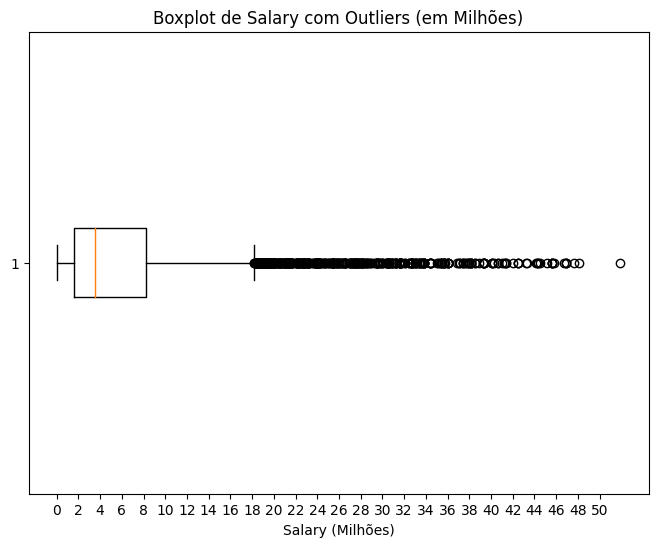

In [129]:
# Converter os valores de salário para milhões
df['salary_milhoes'] = df['salary'] / 1e6

# Gerar boxplot da coluna 'salary_milhoes' com outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['salary_milhoes'].dropna(), vert=False)
plt.title('Boxplot de Salary com Outliers (em Milhões)')
plt.xlabel('Salary (Milhões)')

# Ajustar os ticks do eixo x para intervalos de 5 em 5 milhões
plt.xticks(ticks=range(0, int(df['salary_milhoes'].max() // 2 * 2) + 2, 2))

# Exibir o gráfico
plt.show()

df = df.drop(columns=['salary_milhoes'])


Resultados mostra que a maioria dos salários está entre 0 e 20 milhões de dólares, com uma mediana de cerca de 7 milhões.

Há muitos outliers, com salários que chegam a 50 milhões, revelando uma grande disparidade.

A distribuição é assimétrica de cauda longa, com uma minoria de jogadores altamente remunerada elevando os valores extremos.










## Gráfico de correlação

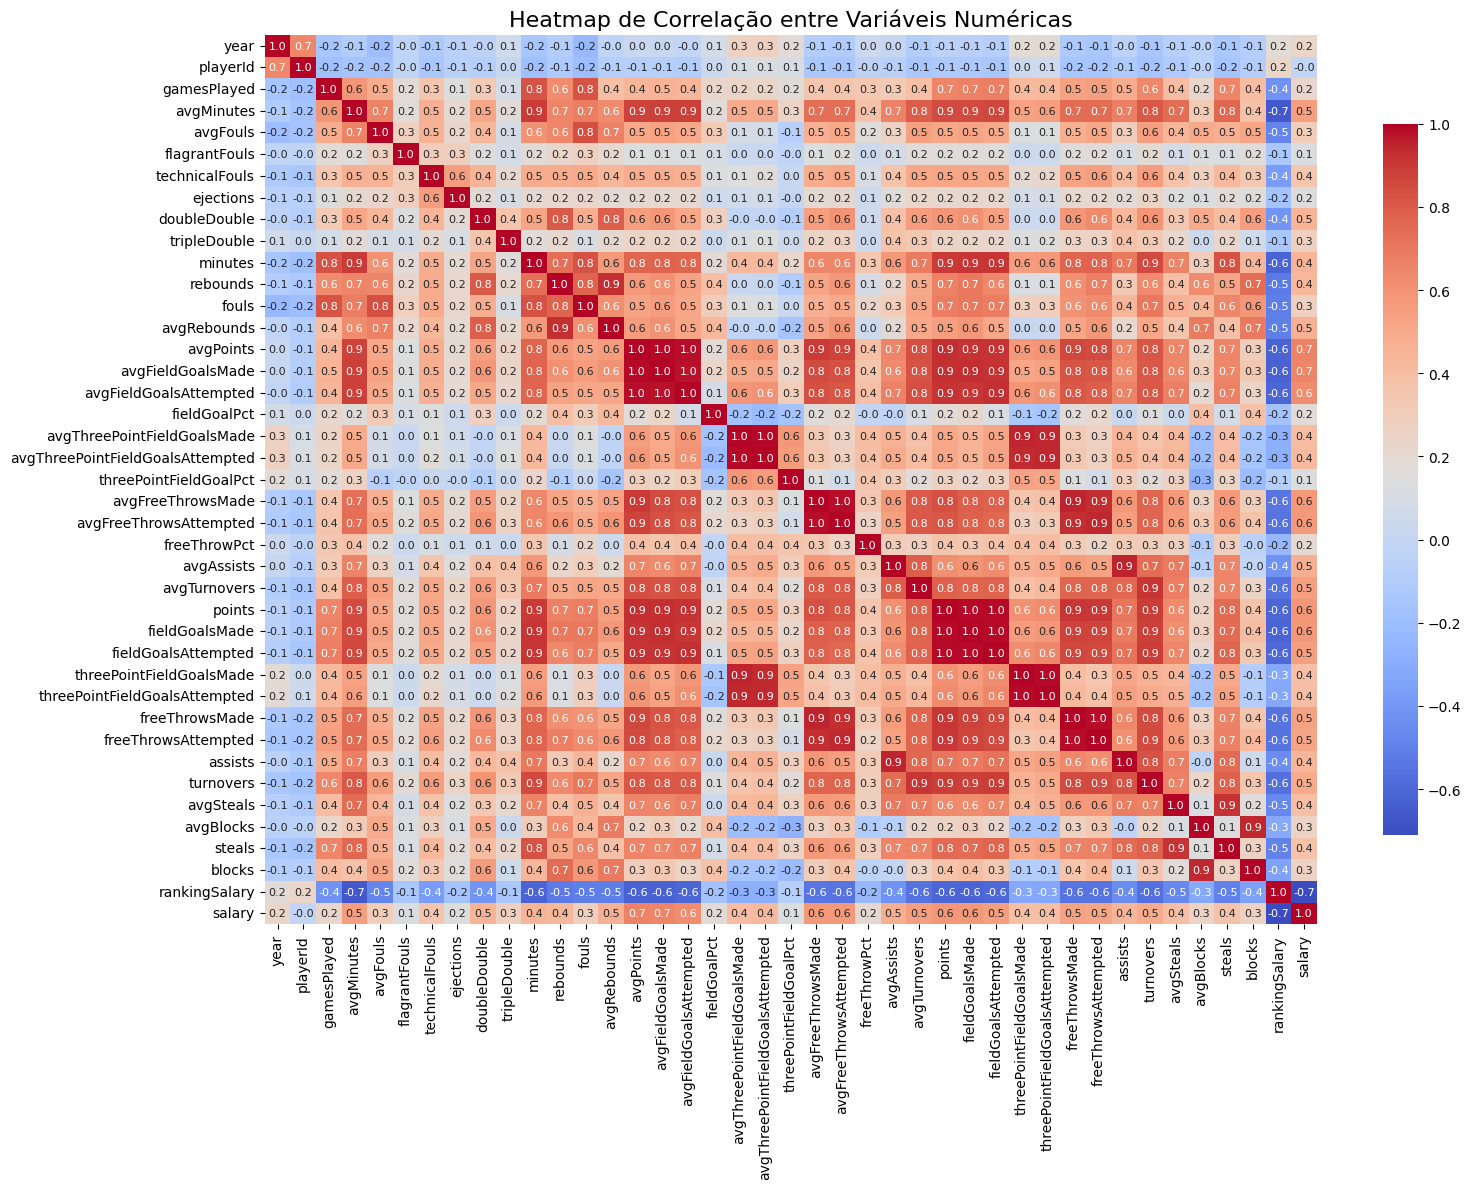

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar apenas as colunas numéricas do DataFrame
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Gerar a matriz de correlação
correlation_matrix = numerical_df.corr()

# Criar o heatmap de correlação
plt.figure(figsize=(16, 12))  # Tamanho maior para células maiores e melhor visualização
sns.heatmap(correlation_matrix,
            annot=True,            # Adicionar anotação para exibir valores
            annot_kws={"size": 8}, # Tamanho da fonte das anotações
            cmap='coolwarm',       # Paleta de cores
            # linewidths=0.1,        # Espessura das linhas entre as células
            # linecolor='black',     # Cor das linhas entre as células
            fmt=".1f",             # Formato dos números (2 casas decimais)
            cbar_kws={"shrink": 0.8})  # Ajuste do tamanho da barra de cores

# Adicionar título
plt.title('Heatmap de Correlação entre Variáveis Numéricas', fontsize=16)

# Exibir o gráfico com layout ajustado
plt.tight_layout()
plt.show()


## Determinar correlações mais fortes - geral
Threshold: Define um limite de 0.7 para destacar apenas as correlações fortes (acima de 0.7 ou abaixo de -0.7).

Máscara de correlação: Cria-se uma nova matriz que mantém apenas as correlações fortes, substituindo o resto por NaN.

Tabela de correlações fortes: A matriz filtrada é exibida, mostrando somente as correlações significativas.

Heatmap de correlações fortes: Um novo gráfico é gerado, focando nas variáveis que têm correlações altas (fortes).

In [131]:
import numpy as np

# Definir o limite de correlação forte
threshold = 0.7

# Criar uma máscara para correlações maiores que 0.7 ou menores que -0.7
strong_corr = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Exibir a matriz de correlações fortes
print("Matriz de Correlações Fortes (|correlation| > 0.7):")
print(strong_corr.fillna(''))




Matriz de Correlações Fortes (|correlation| > 0.7):
                                 year playerId gamesPlayed avgMinutes  \
year                              1.0                                   
playerId                                   1.0                          
gamesPlayed                                            1.0              
avgMinutes                                                        1.0   
avgFouls                                                                
flagrantFouls                                                           
technicalFouls                                                          
ejections                                                               
doubleDouble                                                            
tripleDouble                                                            
minutes                                           0.830399   0.897467   
rebounds                                                                

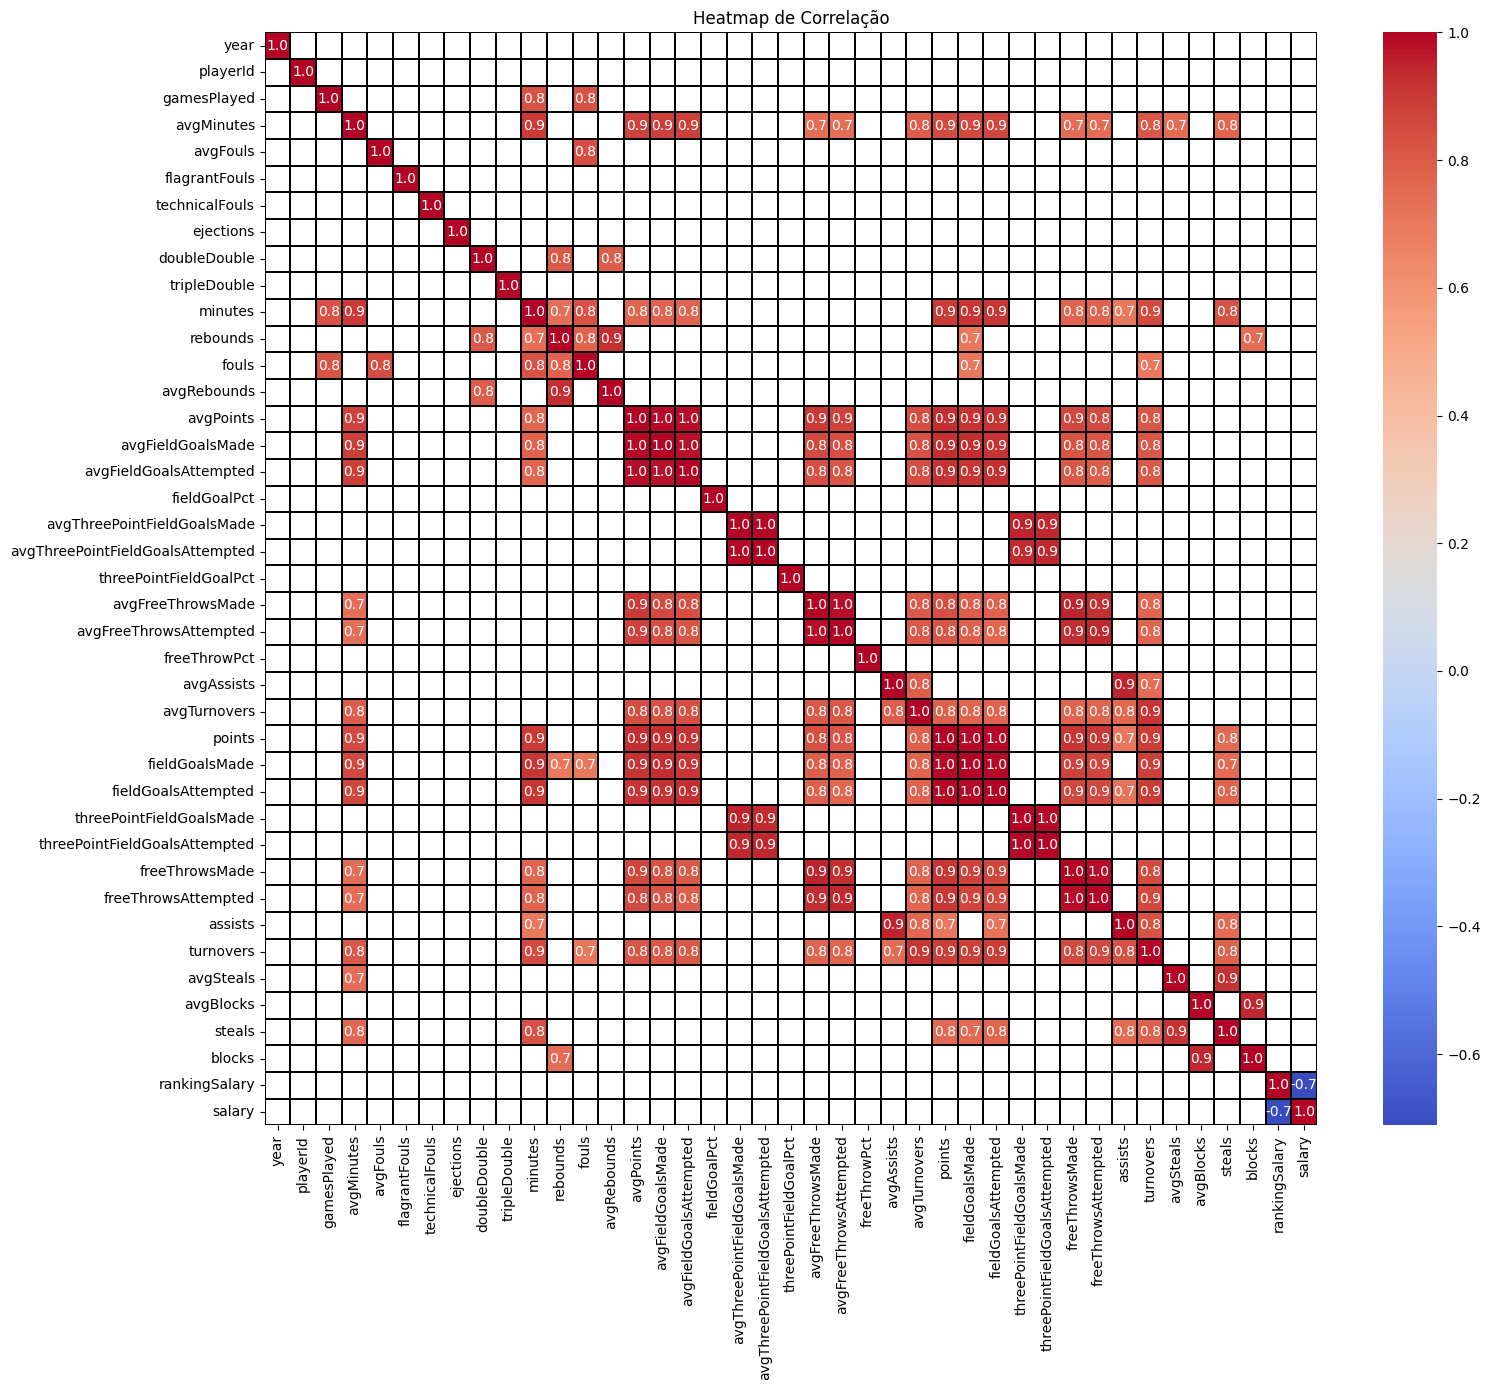

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar tamanho das células e reduzir tamanho do grid
plt.figure(figsize=(16, 14))  # Aumentar o tamanho da figura para deixar as células maiores

# Reduzir o tamanho do grid com 'linewidths' e ajustar o tamanho das células com figsize
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', linewidths=0.01, linecolor='black', fmt=".1f",
            mask=strong_corr.isnull(), annot_kws={"size": 10})  # Aumentar tamanho da fonte para 12

# Adicionar título
plt.title('Heatmap de Correlação')
plt.tight_layout()
plt.show()


## Correlação de features com salário

In [133]:
# Correlação de features com salário
correlation_matrix['salary'].sort_values(ascending=False)

,salary
salary,1.000000
avgPoints,0.663278
avgFieldGoalsMade,0.654786
avgFieldGoalsAttempted,0.623984
points,0.583561
avgFreeThrowsMade,0.578352
fieldGoalsMade,0.574301
avgFreeThrowsAttempted,0.569542
avgTurnovers,0.547378
fieldGoalsAttempted,0.546904


# 3 - Limpeza dos dados

## Função para remover outliers

In [134]:
# Função para remover outliers usando a função identify_outliers já existente
def remove_outliers(df, column):
    # Identificar os outliers
    outliers = identify_outliers(df, column)

    # Remover as linhas que correspondem aos outliers
    df_cleaned = df.drop(outliers.index)

    return df_cleaned



## Transformador de limpeza

In [135]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

class Limpeza(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        df = X.copy()

        # Replicar os ids para a coluna 'team'
        df['team'] = df['teamId']

        # Replicar os position para a coluna 'positionId'
        df['positionId'] = df['position']

        # Remover linhas com valores nulos na coluna 'positionId'
        df = df.dropna(subset=['positionId'])

        # Remover colunas pouco relevantes, ignorando caso não existam
        cols_to_drop = ["college", "draftinfo", "birthplace", "htwt", "experience", "salary_milhoes"]
        df = df.drop(columns=cols_to_drop, errors='ignore')

        # Verificar valores nulos e preencher com 0
        df = df.fillna(0)

        # Remover outliers na coluna 'salary'
        df_cleaned = remove_outliers(df, 'salary')

        return df_cleaned


# 4 - Preparação dos dados

## Transformador de preparação de dados

In [136]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# Definir o transformador de preparação com scaler e one-hot encoding
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# Definir o transformador de preparação com scaler e one-hot encoding
class Preparacao(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.scaler = StandardScaler()
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
        # Identificar colunas numéricas e categóricas, excluindo 'salary'
        self.numerical_cols = X.select_dtypes(include=[np.number]).columns.drop('salary', errors='ignore')
        self.categorical_cols = X.select_dtypes(include=['object']).columns

        # Ajustar o scaler nas colunas numéricas
        self.scaler.fit(X[self.numerical_cols])

        # Ajustar o encoder nas colunas categóricas
        self.encoder.fit(X[self.categorical_cols])

        return self

    def transform(self, X, y=None):
        df = X.copy()

        # Preencher valores nulos com a média nas colunas numéricas
        df[self.numerical_cols] = df[self.numerical_cols].fillna(df[self.numerical_cols].mean())

        # Aplicar o scaler nas colunas numéricas
        df_scaled = pd.DataFrame(self.scaler.transform(df[self.numerical_cols]), columns=self.numerical_cols)

        # Aplicar o encoder nas colunas categóricas
        df_encoded = pd.DataFrame(self.encoder.transform(df[self.categorical_cols]),
                                  columns=self.encoder.get_feature_names_out(self.categorical_cols))

        # Garantir que os índices sejam consistentes entre os dois DataFrames
        df_scaled.reset_index(drop=True, inplace=True)
        df_encoded.reset_index(drop=True, inplace=True)

        # Combinar os dados escalados e codificados
        df_transformed = pd.concat([df_scaled, df_encoded], axis=1)

        return df_transformed


## Features escolhidas para treinamento, de acordo com maior grau de correlação com salário


rankingSalary: -0.7 (correlação negativa)

## Features para cálculo de performance

### 1. Features Originais (da matriz):

#### 1.1. **avgPoints (Média de Pontos)**  
   - **Descrição**: A média de pontos marcados por jogo.  
   - **Peso**: 0.40  
   - **Importância**: Reflete diretamente a capacidade ofensiva do jogador e é uma das principais métricas de destaque.

#### 1.2. **rebounds (Rebotes)**  
   - **Descrição**: Número total de rebotes (defensivos e ofensivos) por jogo.  
   - **Peso**: 0.10  
   - **Importância**: Reflete a presença física e a capacidade de ajudar a defesa e o ataque.

#### 1.3. **assists (Assistências)**  
   - **Descrição**: Número de passes que resultaram diretamente em pontos por jogo.  
   - **Peso**: 0.10  
   - **Importância**: Reflete a habilidade de criar oportunidades de pontuação para outros jogadores.

#### 1.4. **steals (Roubos de Bola)**  
   - **Descrição**: Número de vezes que o jogador conseguiu tomar a bola do adversário por jogo.  
   - **Peso**: 0.05  
   - **Importância**: Reflete a habilidade defensiva e de antecipação.

#### 1.5. **blocks (Bloqueios)**  
   - **Descrição**: Número de arremessos bloqueados por jogo.  
   - **Peso**: 0.05  
   - **Importância**: Reflete a habilidade defensiva do jogador, especialmente na proteção do garrafão.

#### 1.6. **fieldGoalPct (Percentual de Cestas de Campo)**  
   - **Descrição**: Percentual de cestas convertidas em relação ao total de arremessos tentados.  
   - **Peso**: 0.05  
   - **Importância**: Reflete a eficiência do jogador em converter arremessos de campo.

#### 1.7. **threePointFieldGoalPct (Percentual de Cestas de 3 Pontos)**  
   - **Descrição**: Percentual de cestas de 3 pontos convertidas em relação ao total de tentativas.  
   - **Peso**: 0.05  
   - **Importância**: Reflete a capacidade do jogador em converter arremessos de longa distância.

#### 1.8. **freeThrowPct (Percentual de Lances Livres)**  
   - **Descrição**: Percentual de lances livres convertidos em relação ao total de tentativas.  
   - **Peso**: 0.05  
   - **Importância**: Reflete a capacidade de converter pontos em oportunidades de lances livres.

#### 1.9. **minutes (Minutos Jogados)**  
   - **Descrição**: O número total de minutos jogados por jogo.  
   - **Peso**: 0.40  
   - **Importância**: Destaca a presença do jogador em quadra e sua durabilidade física, sendo uma das métricas principais de destaque.

---

### 2. Features Calculadas:

#### 2.1. **Eficiência Ofensiva**  
   - **Descrição**: Mede a eficiência do jogador no ataque, combinando pontos e assistências e penalizando pelos turnovers (perdas de bola).  
   - **Fórmula**:  
     Eficiência Ofensiva = avgPoints + assists - turnovers
   - **Peso**: 0.15  
   - **Importância**: Reflete diretamente a contribuição ofensiva do jogador, levando em conta pontos, assistências e erros.

#### 2.2. **Eficiência de Arremesso**  
   - **Descrição**: Avalia a precisão do jogador em todas as áreas de arremesso (cestas de campo, de 3 pontos e lances livres).  
   - **Fórmula**:  
     Eficiência de Arremesso = (fieldGoalPct + threePointFieldGoalPct + freeThrowPct) / 3
   - **Peso**: 0.10  
   - **Importância**: Reflete a consistência do jogador em converter arremessos em diferentes situações.

#### 2.3. **Performance Defensiva**  
   - **Descrição**: Mede a contribuição do jogador na defesa, combinando rebotes, roubos de bola e bloqueios, penalizando pelas faltas.  
   - **Fórmula**:  
     Performance Defensiva = rebounds + steals + blocks - fouls
   - **Peso**: 0.10  
   - **Importância**: Reflete a contribuição defensiva geral do jogador.

#### 2.4. **Presença em Quadra**  
   - **Descrição**: Mede a durabilidade e o tempo em quadra do jogador, refletindo a capacidade de estar disponível e contribuir constantemente ao longo da temporada.  
   - **Fórmula**:  
     Presença em Quadra = minutes + gamesPlayed
   - **Peso**: 0.15  
   - **Importância**: Reflete a frequência com que o jogador está em quadra.

---

### Tabela de Pesos e Classificação

| **Feature**                   | **Origem**    | **Fórmula**                                                    | **Peso** |
|-------------------------------|---------------|----------------------------------------------------------------|----------|
| **avgPoints**                  | Original      | -                                                              | 0.40     |
| **rebounds**                   | Original      | -                                                              | 0.10     |
| **assists**                    | Original      | -                                                              | 0.10     |
| **steals**                     | Original      | -                                                              | 0.05     |
| **blocks**                     | Original      | -                                                              | 0.05     |
| **fieldGoalPct**               | Original      | -                                                              | 0.05     |
| **threePointFieldGoalPct**     | Original      | -                                                              | 0.05     |
| **freeThrowPct**               | Original      | -                                                              | 0.05     |
| **minutes**                    | Original      | -                                                              | 0.40     |
| **Eficiência Ofensiva**        | Calculada     | avgPoints + assists - turnovers                                 | 0.15     |
| **Eficiência de Arremesso**    | Calculada     | (fieldGoalPct + threePointFieldGoalPct + freeThrowPct) / 3      | 0.10     |
| **Performance Defensiva**      | Calculada     | rebounds + steals + blocks - fouls                              | 0.10     |
| **Presença em Quadra**         | Calculada     | minutes + gamesPlayed                                           | 0.15     |

### Conclusão:
As features selecionadas medem a performance dos jogadores da NBA, com maior destaque para aquelas que impactam mais, como média de pontos e minutos jogados. As novas features calculadas oferecem uma visão equilibrada e clara do impacto ofensivo, defensivo e eficiência geral dos jogadores.

In [137]:
# # import pandas as pd

# # # Definir os pesos para cada métrica de desempenho (baseado na listagem de importância para o modelo RandomForest)
# # pesos = {
# #     "avgPoints": 0.10,                    # Média de pontos por jogo
# #     "avgFieldGoalsMade": 0.17,            # Média de arremessos de quadra convertidos por jogo
# #     "avgFieldGoalsAttempted": 0.03,       # Média de arremessos de quadra tentados por jogo
# #     "points": 0.03,                       # Total de pontos ao longo da temporada
# #     "avgFreeThrowsMade": 0.02,            # Média de lances livres convertidos por jogo
# #     "fieldGoalsMade": 0.03,               # Total de arremessos de quadra convertidos ao longo da temporada
# #     "avgFreeThrowsAttempted": 0.02,       # Média de lances livres tentados por jogo
# #     "avgTurnovers": -0.03,                # Média de turnovers (perdas de posse) por jogo (penalização)
# #     "fieldGoalsAttempted": 0.03,          # Total de arremessos de quadra tentados ao longo da temporada
# #     "avgMinutes": 0.20,                   # Média de minutos jogados por jogo
# #     "freeThrowsMade": 0.02,               # Total de lances livres convertidos ao longo da temporada
# #     "freeThrowsAttempted": 0.02,          # Total de lances livres tentados ao longo da temporada
# #     'fg_percentage': 0.03,                # Percentual de arremessos de quadra convertidos
# #     'ft_percentage': 0.04,                # Percentual de lances livres convertidos
# #     'true_shooting_percentage': 0.06,     # Percentual de acerto ajustado para arremessos de quadra e lances livres
# #     'turnover_ratio': -0.03,              # Proporção de turnovers por minuto jogado (penalização)
# #     'points_per_minute': 0.05,            # Pontos por minuto jogado
# #     'field_goals_efficiency': 0.03,       # Eficiência nos arremessos de quadra (convertidos / tentados)
# #     'free_throw_rate': 0.03               # Frequência de idas à linha de lance livre (lances livres tentados / arremessos de quadra tentados)
# # }


# # # Criar as novas features no DataFrame
# # def criar_novas_features(df):
# #     # Substituir valores problemáticos por NaN para tratar erros posteriores
# #     df['avgFieldGoalsAttempted'].replace(0, np.nan, inplace=True)
# #     df['avgFreeThrowsAttempted'].replace(0, np.nan, inplace=True)
# #     df['avgMinutes'].replace(0, np.nan, inplace=True)

# #     # Field Goal Percentage (FG%)
# #     df['fg_percentage'] = df['avgFieldGoalsMade'] / df['avgFieldGoalsAttempted']

# #     # Free Throw Percentage (FT%)
# #     df['ft_percentage'] = df['avgFreeThrowsMade'] / df['avgFreeThrowsAttempted']

# #     # True Shooting Percentage (TS%)
# #     df['true_shooting_percentage'] = df['points'] / (2 * (df['fieldGoalsAttempted'] + 0.44 * df['freeThrowsAttempted']))

# #     # Turnover Ratio
# #     df['turnover_ratio'] = df['avgTurnovers'] / df['avgMinutes']

# #     # Points per Minute
# #     df['points_per_minute'] = df['avgPoints'] / df['avgMinutes']

# #     # Field Goals Efficiency
# #     df['field_goals_efficiency'] = df['fieldGoalsMade'] / df['fieldGoalsAttempted']

# #     # Free Throw Rate (FTR)
# #     df['free_throw_rate'] = df['avgFreeThrowsAttempted'] / df['avgFieldGoalsAttempted']

# #     # Preencher valores NaN resultantes das divisões
# #     df.fillna(0, inplace=True)

# #     return df

# # # Aplicar a função para criar novas features
# # df = criar_novas_features(df)

# # # Função para calcular a performance sem considerar a posição
# # def calcular_performance(row):
# #     return (
# #         pesos['avgPoints'] * row['avgPoints'] +
# #         pesos['avgFieldGoalsMade'] * row['avgFieldGoalsMade'] +
# #         pesos['avgFieldGoalsAttempted'] * row['avgFieldGoalsAttempted'] +
# #         pesos['points'] * row['points'] +
# #         pesos['avgFreeThrowsMade'] * row['avgFreeThrowsMade'] +
# #         pesos['fieldGoalsMade'] * row['fieldGoalsMade'] +
# #         pesos['avgFreeThrowsAttempted'] * row['avgFreeThrowsAttempted'] -
# #         pesos['avgTurnovers'] * row['avgTurnovers'] +
# #         pesos['fieldGoalsAttempted'] * row['fieldGoalsAttempted'] +
# #         pesos['avgMinutes'] * row['avgMinutes'] +
# #         pesos['freeThrowsMade'] * row['freeThrowsMade'] +
# #         pesos['freeThrowsAttempted'] * row['freeThrowsAttempted'] +
# #         pesos['fg_percentage'] * row['fg_percentage'] +  # Peso para FG%
# #         pesos['ft_percentage'] * row['ft_percentage'] +  # Peso para FT%
# #         pesos['true_shooting_percentage'] * row['true_shooting_percentage'] +  # Peso para TS%
# #         pesos['turnover_ratio'] * row['turnover_ratio'] +  # Penaliza turnovers por minuto
# #         pesos['points_per_minute'] * row['points_per_minute'] +  # Peso para pontos por minuto
# #         pesos['field_goals_efficiency'] * row['field_goals_efficiency'] +  # Peso para eficiência nos arremessos
# #         pesos['free_throw_rate'] * row['free_throw_rate']  # Peso para frequência de lances livres

# #     )

# # # Aplicar a função de cálculo da performance para cada linha
# # df['performance'] = df.apply(calcular_performance, axis=1)

# # # Exibir o dataframe com a performance calculada
# # print(df[['year', 'name', 'performance']])

# # df.info()


In [138]:
import pandas as pd
import numpy as np

# Pesos ajustados para destacar 'avgPoints' e 'minutes'
pesos = {
    'avgPoints': 0.40,
    'rebounds': 0.10,
    'assists': 0.10,
    'steals': 0.05,
    'blocks': 0.05,
    'fieldGoalPct': 0.05,
    'threePointFieldGoalPct': 0.05,
    'freeThrowPct': 0.05,
    'minutes': 0.40,
    'Eficiência Ofensiva': 0.15,
    'Eficiência de Arremesso': 0.10,
    'Performance Defensiva': 0.10,
    'Presença em Quadra': 0.15
}

# Tratar valores ausentes e zeros nas colunas de percentuais (evitar divisão por zero)
df[['fieldGoalPct', 'threePointFieldGoalPct', 'freeThrowPct']] = df[['fieldGoalPct', 'threePointFieldGoalPct', 'freeThrowPct']].replace(0, 0.1)

# Criar features calculadas com tratamento para NaN e divisões por zero
df['Eficiência Ofensiva'] = df['avgPoints'] + df['assists'] - df['turnovers']
df['Eficiência de Arremesso'] = df[['fieldGoalPct', 'threePointFieldGoalPct', 'freeThrowPct']].mean(axis=1, skipna=True)
df['Performance Defensiva'] = df['rebounds'] + df['steals'] + df['blocks'] - df['fouls']
df['Presença em Quadra'] = df['minutes'] + df['gamesPlayed']

# Função para calcular a performance do jogador com base nas features e pesos ajustados
def calcular_performance(row):
    performance = (
        row['avgPoints'] * pesos['avgPoints'] +
        row['rebounds'] * pesos['rebounds'] +
        row['assists'] * pesos['assists'] +
        row['steals'] * pesos['steals'] +
        row['blocks'] * pesos['blocks'] +
        row['fieldGoalPct'] * pesos['fieldGoalPct'] +
        row['threePointFieldGoalPct'] * pesos['threePointFieldGoalPct'] +
        row['freeThrowPct'] * pesos['freeThrowPct'] +
        row['minutes'] * pesos['minutes'] +
        row['Eficiência Ofensiva'] * pesos['Eficiência Ofensiva'] +
        row['Eficiência de Arremesso'] * pesos['Eficiência de Arremesso'] +
        row['Performance Defensiva'] * pesos['Performance Defensiva'] +
        row['Presença em Quadra'] * pesos['Presença em Quadra']
    )
    return performance

# Aplicar a função para calcular a performance de cada jogador
df['performance'] = df.apply(calcular_performance, axis=1)

# Configurar a exibição para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Exibir o DataFrame resultante com todas as colunas originais e as novas colunas calculadas
df.head()


,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary,Eficiência Ofensiva,Eficiência de Arremesso,Performance Defensiva,Presença em Quadra,performance
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,9000000.0,82.750000,48.481245,255.0,2038.0,1214.182811
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,10125000.0,126.414286,49.151873,254.0,2923.0,1714.615826
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,11250000.0,119.084507,51.806381,324.0,3050.0,1794.448074
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,12375000.0,125.383333,50.048493,348.0,2682.0,1598.822956
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,13500000.0,195.585365,48.870591,433.0,3567.0,2116.639598


In [139]:
df.isnull().sum()

,0
year,0
name,0
playerId,0
playerSlug,0
positionId,6
teamId,0
status,0
gamesPlayed,0
avgMinutes,0
avgFouls,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non-null   float64
 12  ejecti

## Gráfico de correlação com novas features

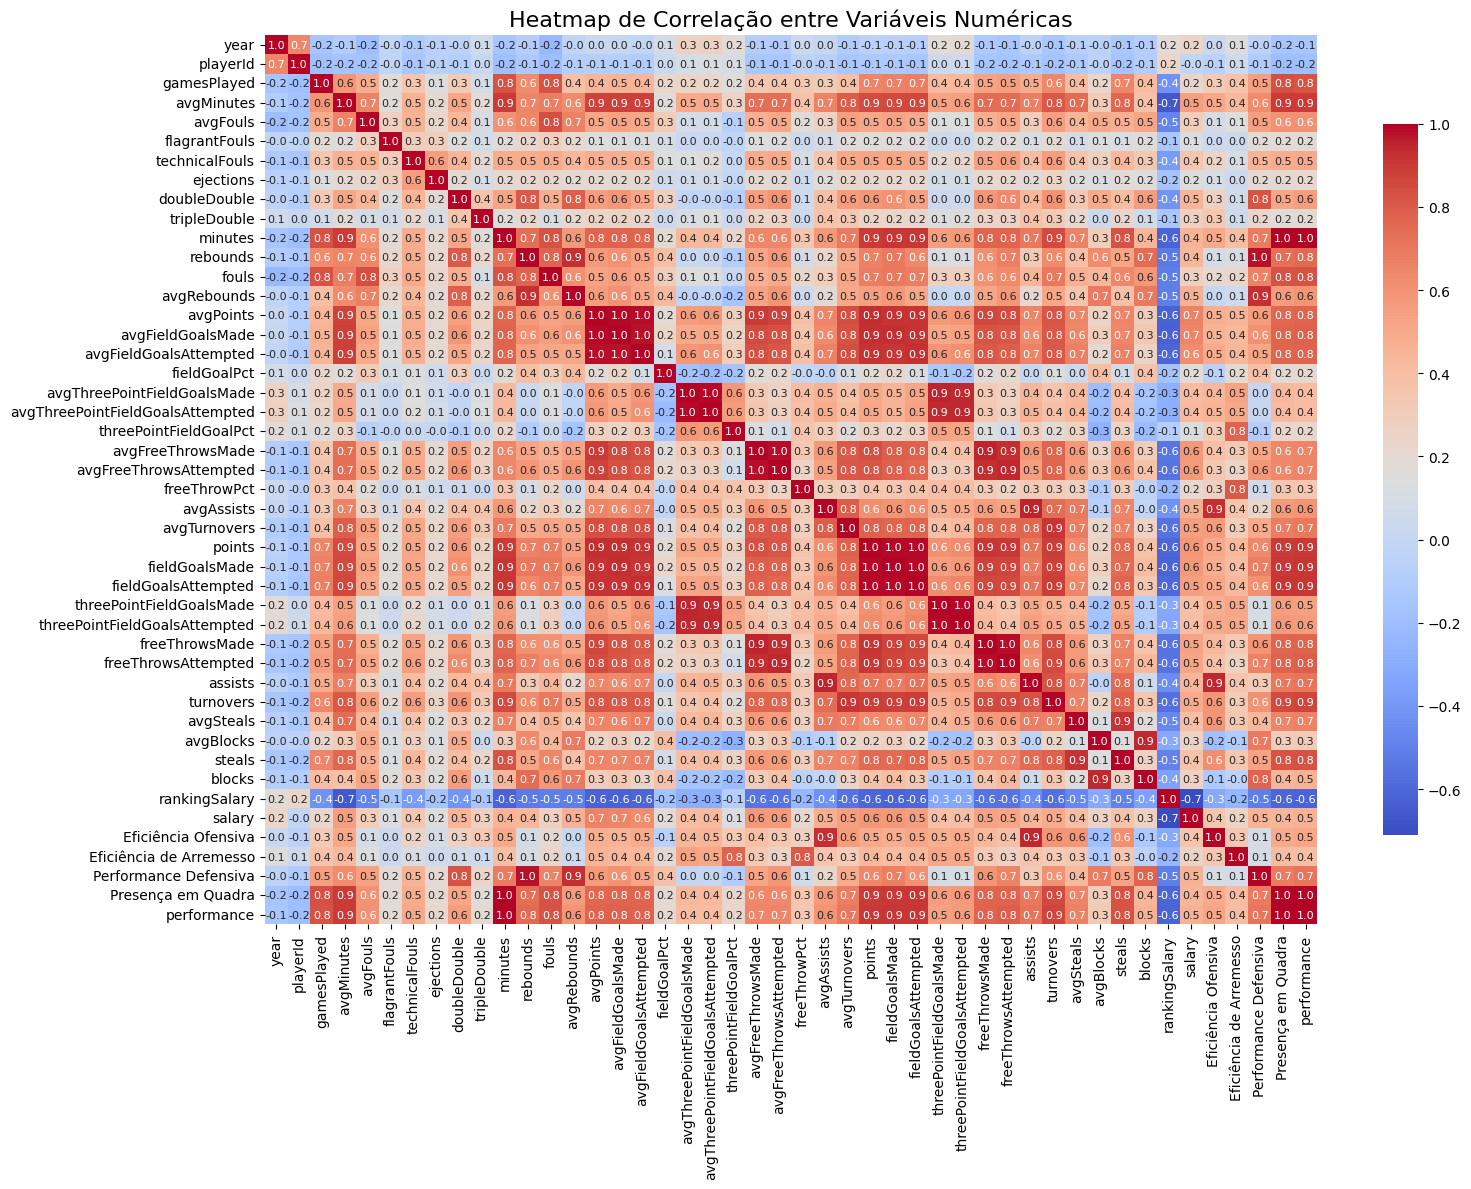

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar apenas as colunas numéricas do DataFrame
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Gerar a matriz de correlação
correlation_matrix = numerical_df.corr()

# Criar o heatmap de correlação
plt.figure(figsize=(16, 12))  # Tamanho maior para células maiores e melhor visualização
sns.heatmap(correlation_matrix,
            annot=True,            # Adicionar anotação para exibir valores
            annot_kws={"size": 8}, # Tamanho da fonte das anotações
            cmap='coolwarm',       # Paleta de cores
            # linewidths=0.1,        # Espessura das linhas entre as células
            # linecolor='black',     # Cor das linhas entre as células
            fmt=".1f",             # Formato dos números (2 casas decimais)
            cbar_kws={"shrink": 0.8})  # Ajuste do tamanho da barra de cores

# Adicionar título
plt.title('Heatmap de Correlação entre Variáveis Numéricas', fontsize=16)

# Exibir o gráfico com layout ajustado
plt.tight_layout()
plt.show()


In [142]:
# Exibir a matriz de correlação em formato de tabela
print("Matriz de Correlação (Tabela):")
print(correlation_matrix)


Matriz de Correlação (Tabela):
                                      year  playerId  gamesPlayed  avgMinutes  \
year                              1.000000  0.650914    -0.153806   -0.097307   
playerId                          0.650914  1.000000    -0.184183   -0.164435   
gamesPlayed                      -0.153806 -0.184183     1.000000    0.589569   
avgMinutes                       -0.097307 -0.164435     0.589569    1.000000   
avgFouls                         -0.197134 -0.168937     0.485495    0.659681   
flagrantFouls                    -0.027397 -0.027376     0.178744    0.159804   
technicalFouls                   -0.120454 -0.141814     0.345299    0.470556   
ejections                        -0.056455 -0.065907     0.147584    0.198178   
doubleDouble                     -0.037456 -0.077424     0.316185    0.514614   
tripleDouble                      0.059272  0.016189     0.081829    0.175880   
minutes                          -0.155980 -0.196591     0.830399    0.897467 

# 5 - Seleção e treinamento de modelo - Linear Regression


In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


# Limpeza dos dados
# Executar função de limpeza
df_linear = Limpeza().transform(df)

# Lista de features que vão ser usadas
selected_features = [
    'avgPoints',
    'avgFieldGoalsMade',
    'avgFieldGoalsAttempted',
    'points',
    'avgFreeThrowsMade',
    'fieldGoalsMade',
    'avgFreeThrowsAttempted',
    'avgTurnovers',
    'fieldGoalsAttempted',
    'avgMinutes',
    'freeThrowsMade',
    'freeThrowsAttempted',
    'Eficiência Ofensiva',  # Features calculadas
    'Eficiência de Arremesso',
    'Performance Defensiva',
    'Presença em Quadra',
    'performance',
    'rankingSalary'
]

# Definir X (features) e y (alvo)
X = df_linear[selected_features]  # Certifique-se de que df já tenha passado por etapas de limpeza e preparação
y = df_linear['salary']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Pipeline que já inclui limpeza, preparação e o modelo de regressão
pipeline = Pipeline(steps=[
    ('preparacao', Preparacao()),  # Já definida em células anteriores
    ('regressor', LinearRegression())  # Regressor Linear
])

# Ajustar o pipeline do modelo nos dados de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_test_pred = pipeline.predict(X_test)

# Calcular o erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Calcular RMSE
test_r2 = r2_score(y_test, y_test_pred)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) no teste: {test_mse}")
print(f"Raiz do erro quadrático médio (RMSE) no teste: {test_rmse}")
print(f"R² no teste: {test_r2}")

# Adicionar as previsões de salário ao dataframe de teste
df_test = df_linear.loc[X_test.index].copy()
df_test['predicted_salary'] = y_test_pred

# Calcular o superfaturamento
df_test['overpaid_amount'] = df_test['salary'] - df_test['predicted_salary']
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['predicted_salary']) * 100

# Exibir os 10 jogadores mais superfaturados
df_superfaturados = df_test.sort_values(by='percentual_superfaturamento', ascending=False)
print(df_superfaturados[['salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].head(10))


Erro quadrático médio (MSE) no teste: 5308197104880.66
Raiz do erro quadrático médio (RMSE) no teste: 2303952.496229178
R² no teste: 0.7100208138174535
         salary  predicted_salary  overpaid_amount  \
3717  664209.00          27087.99        637121.01   
2249  980431.00          40516.14        939914.86   
2504  825497.00          40038.13        785458.87   
7161 1312611.00          70728.96       1241882.04   
6901 1669178.00         102392.89       1566785.11   
4970  947276.00          70000.37        877275.63   
5813  915243.00          67737.62        847505.38   
7278 1378242.00         115535.46       1262706.54   
4028  687456.00          58186.74        629269.26   
6485  980431.00         107303.68        873127.32   

      percentual_superfaturamento  
3717                      2352.04  
2249                      2319.85  
2504                      1961.78  
7161                      1755.83  
6901                      1530.17  
4970                      1253.24  
5

## Calcular o percentual de superfaturamento


In [182]:
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['salary']) * 100

# Exibir as primeiras linhas para verificar o percentual de superfaturamento
df_test_sorted = df_test[['name', 'salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].sort_values(by='percentual_superfaturamento', ascending=False)

# Exibir as primeiras linhas
print(df_test_sorted.head())


                name   salary  predicted_salary  overpaid_amount  \
6446  Elijah Millsap 23069.00       -3863408.36       3886477.36   
2895   Dahntay Jones  5767.00        -745269.58        751036.58   
4977      Alonzo Gee 57672.00       -5224458.66       5282130.66   
5107   Lester Hudson 48232.00       -4178797.69       4227029.69   
4705        Rob Kurz 25991.00       -1578137.89       1604128.89   

      percentual_superfaturamento  
6446                     16847.19  
2895                     13023.00  
4977                      9158.92  
5107                      8763.95  
4705                      6171.86  


## Ordenar os jogadores mais superfaturados e exibir os 10 mais superfaturados

In [183]:
# 11. Ordenar os jogadores mais superfaturados
overpaid_players = df_test[['name', 'positionId', 'salary', 'predicted_salary', 'overpaid_amount', 'performance', 'year', 'percentual_superfaturamento']].sort_values(by='overpaid_amount', ascending=False)

# 12. Exibir os 10 jogadores mais superfaturados
print("Jogadores mais superfaturados:")
overpaid_players.head(10)


Jogadores mais superfaturados:


,name,positionId,salary,predicted_salary,overpaid_amount,performance,year,percentual_superfaturamento
7588,Duncan Robinson,Forward,18154000.00,8316935.28,9837064.72,418.19,2023,54.19
5513,Bismack Biyombo,Center,17000000.00,7984210.64,9015789.36,946.54,2018,53.03
3017,Luol Deng,Forward,17190000.00,8385770.02,8804229.98,916.91,2017,51.22
5502,Tristan Thompson,Center,17469565.00,8666379.43,8803185.57,677.96,2018,50.39
3016,Luol Deng,Forward,18000000.00,9650454.69,8349545.31,1462.22,2016,46.39
6516,Spencer Dinwiddie,Point Guard,17142857.00,9111570.00,8031287.00,57.31,2021,46.85
6475,Aaron Gordon,Power Forward,18136364.00,10208874.75,7927489.25,1276.40,2020,43.71
5914,Evan Fournier,Shooting Guard,17000000.00,9088265.88,7911734.12,1325.32,2017,46.54
5334,Timofey Mozgov,Center,16000000.00,8095083.25,7904916.75,816.96,2016,49.41
7285,Markelle Fultz,Point Guard,17000000.00,9177646.89,7822353.11,1123.02,2023,46.01


## Curva de Previsão vs Real
Mostra os valores reais contra os valores previstos pelo modelo. Idealmente, todos os pontos devem estar próximos da linha y = x, indicando que o modelo faz boas previsões

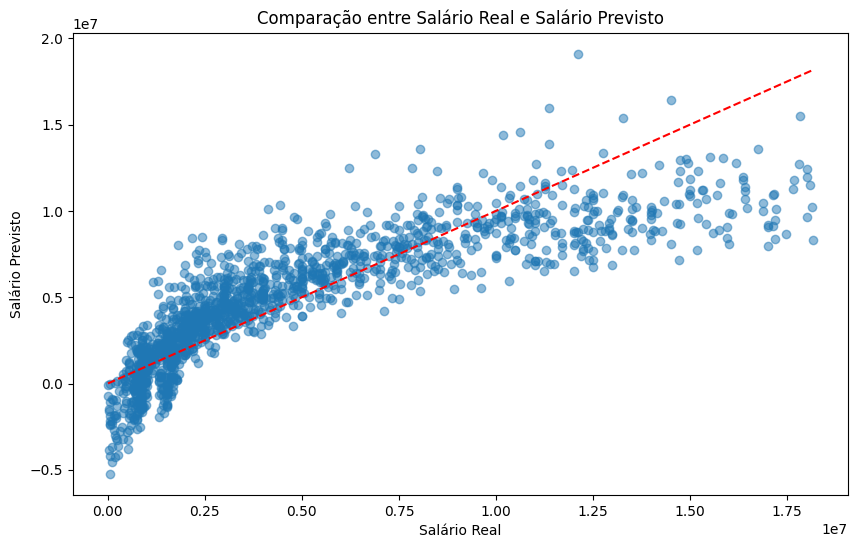

In [184]:
import matplotlib.pyplot as plt

# Comparar salário real com o previsto
plt.figure(figsize=(10, 6))
plt.scatter(df_test['salary'], df_test['predicted_salary'], alpha=0.5)
plt.plot([df_test['salary'].min(), df_test['salary'].max()], [df_test['salary'].min(), df_test['salary'].max()], 'r--')
plt.xlabel('Salário Real')
plt.ylabel('Salário Previsto')
plt.title('Comparação entre Salário Real e Salário Previsto')
plt.show()


### Análise:
Há uma correlação entre os salários reais e previstos, mas o modelo subestima os salários mais altos. A dispersão dos pontos em torno da linha de regressão ideal mostra que o modelo linear não representa perfeitamente a relação entre as features e o salário.

## Gráfico de Resíduos
Diferença entre os valores reais e as previsões (resíduos) em relação aos valores preditos
Se os resíduos estão distribuídos de forma aleatória em torno de zero, isso indica que o modelo é adequado. Padrões claros, como uma curva, podem indicar underfitting ou que uma relação não linear está faltando.


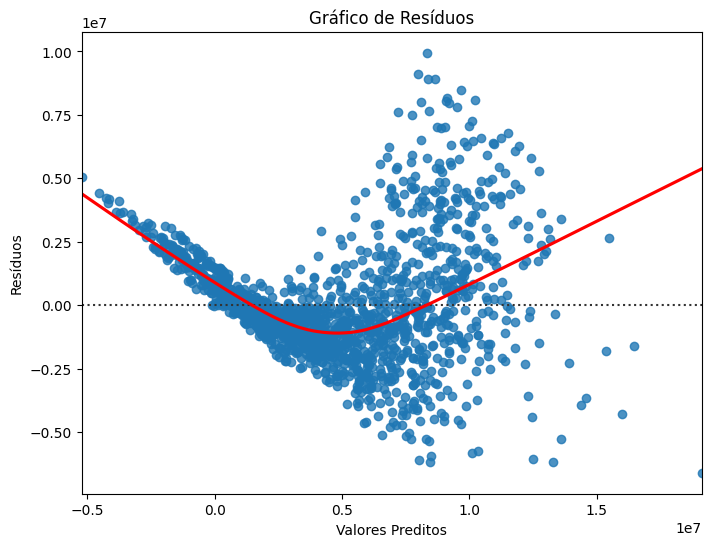

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular os resíduos
residuals = y_test - y_test_pred

# Criar o gráfico de resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()


### Análise

**Gráfico de Resíduos**:  
O comportamento em forma de U nos resíduos indica que o modelo de regressão linear não captura bem as relações não lineares. A curva assimétrica sugere que ajustes não lineares ou transformações nas features podem ser necessários. A distribuição não aleatória dos resíduos sugere um viés do modelo em certas faixas salariais.



## Histograma dos Resíduos

Mostra a distribuição dos erros (diferença entre o valor predito e o valor real). A distribuição deve ser aproximadamente normal, com uma média próxima de zero.

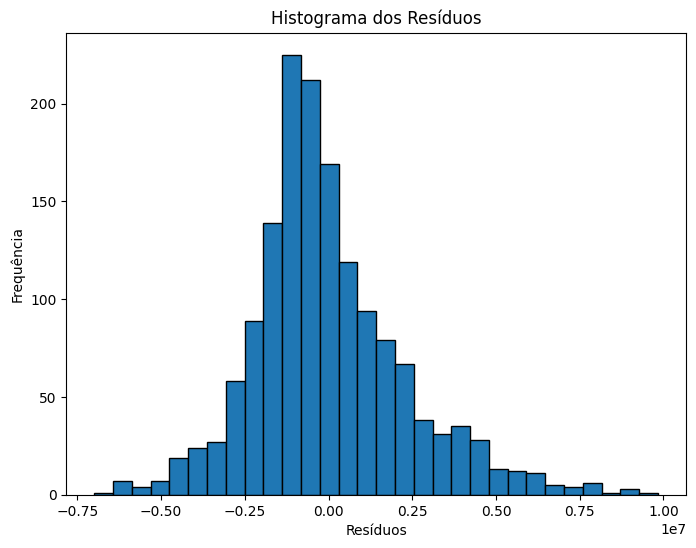

In [186]:
# Plotar o histograma dos resíduos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


### Análise:
A distribuição é quase normal e centrada em zero, mas há uma leve tendência de superestimar alguns salários.

## Gráfico de Erro Acumulado

Mostra o erro acumulado entre os valores reais e preditos. Um gráfico com uma linha reta ou acumulando pouco erro sugere um bom modelo, enquanto uma linha que sobe abruptamente sugere um modelo com muitos erros em suas previsões.
Se o erro acumulado aumenta drasticamente, isso indica que o modelo está errando consistentemente em um grupo de dados.


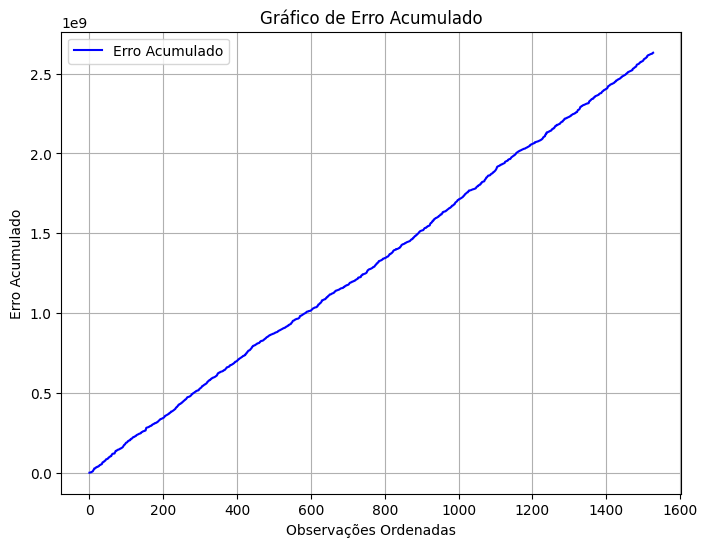

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que já existam y_test (valores reais) e y_test_pred (valores previstos) do modelo

# Calcular os erros acumulados
errors = np.abs(y_test - y_test_pred)
cumulative_errors = np.cumsum(errors)

# Ordenar os erros para visualização
sorted_errors = np.sort(cumulative_errors)

# Gerar o gráfico de erro acumulado
plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, label='Erro Acumulado', color='b')
plt.title('Gráfico de Erro Acumulado')
plt.xlabel('Observações Ordenadas')
plt.ylabel('Erro Acumulado')
plt.legend()
plt.grid(True)
plt.show()


### Análise
Mostra uma tendência linear, indicando que o erro entre os valores previstos e reais se acumula de forma consistente. Isso sugere que o modelo comete erros de maneira uniforme em todas as observações.

Se o gráfico mostrasse picos ou mudanças bruscas na inclinação, isso indicaria que o modelo estaria cometendo maiores erros em certos pontos específicos.


## Conclusão

### Linear Regression:

Apresentou um desempenho moderado, com um MSE elevado (5.31e+12), um RMSE de aproximadamente 2.3 milhões e um R² de 0.71, indicando que ele explica 71% da variabilidade dos dados.

No entanto, os gráficos de resíduos mostram padrões não lineares, sugerindo que o modelo não captura bem as complexidades nos dados, principalmente para valores maiores de salário.

# 6 - Seleção e treinamento de modelo - Random Forest


In [172]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Limpeza dos dados
# Executar função de limpeza
df_rf = Limpeza().transform(df)

# Lista de features que vão ser usadas
selected_features = [
    'avgPoints',
    'avgFieldGoalsMade',
    'avgFieldGoalsAttempted',
    'points',
    'avgFreeThrowsMade',
    'fieldGoalsMade',
    'avgFreeThrowsAttempted',
    'avgTurnovers',
    'fieldGoalsAttempted',
    'avgMinutes',
    'freeThrowsMade',
    'freeThrowsAttempted',
    'Eficiência Ofensiva',  # Features calculadas
    'Eficiência de Arremesso',
    'Performance Defensiva',
    'Presença em Quadra',
    'performance',
    'rankingSalary'
]

# Definir X (features) e y (alvo)
X = df_rf[selected_features]
y = df_rf['salary']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os hiperparâmetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 1000),          # Número de árvores na floresta
    'max_depth': randint(3, 20),                 # Profundidade máxima de cada árvore
    'min_samples_split': randint(2, 20),         # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': randint(1, 10),          # Número mínimo de amostras necessárias em cada folha
    'max_features': ['sqrt', 'log2', None],      # Número de features a considerar ao procurar a melhor divisão
}


# Criar o modelo RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)

# Pipeline que já inclui preparação e o modelo RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preparacao', Preparacao()),  # Já definida em células anteriores
    ('regressor', RandomizedSearchCV(
        estimator=random_forest,
        param_distributions=param_distributions,
        n_iter=100,               # Número de combinações a serem testadas
        cv=5,                     # Validação cruzada com 5 dobras
        verbose=2,
        random_state=42,
        n_jobs=-1                 # Utilizar múltiplos núcleos
    ))
])

# Ajustar o pipeline do modelo nos dados de treinamento
pipeline.fit(X_train, y_train)

# Obter o melhor modelo encontrado pelo RandomizedSearchCV
best_model = pipeline.named_steps['regressor'].best_estimator_
print("Melhor combinação de parâmetros:", pipeline.named_steps['regressor'].best_params_)

# Fazer previsões nos dados de teste
y_test_pred = pipeline.predict(X_test)

# Calcular o erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Calcular RMSE
test_r2 = r2_score(y_test, y_test_pred)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) no teste: {test_mse}")
print(f"Raiz do erro quadrático médio (RMSE) no teste: {test_rmse}")
print(f"R² no teste: {test_r2}")

# Adicionar as previsões de salário ao dataframe de teste
df_test = df_rf.loc[X_test.index].copy()
df_test['predicted_salary'] = y_test_pred

# Calcular o superfaturamento
df_test['overpaid_amount'] = df_test['salary'] - df_test['predicted_salary']
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['predicted_salary']) * 100

# Exibir os 10 jogadores mais superfaturados
df_superfaturados = df_test.sort_values(by='percentual_superfaturamento', ascending=False)
print(df_superfaturados[['salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].head(10))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhor combinação de parâmetros: {'max_depth': 19, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 573}
Erro quadrático médio (MSE) no teste: 3320991040314.8667
Raiz do erro quadrático médio (RMSE) no teste: 1822358.6475540062
R² no teste: 0.8185790278389288
          salary  predicted_salary  overpaid_amount  \
7794   757453.00         226397.44        531055.56   
5393   788872.00         270535.70        518336.30   
4158   512633.00         178707.65        333925.35   
2177   839312.00         325837.51        513474.49   
5464  1392896.00         542512.70        850383.30   
4388 15944154.00        6327968.43       9616185.57   
3583   872854.00         352522.20        520331.80   
6846   874636.00         387626.65        487009.35   
5328 11286516.00        5128732.80       6157783.20   
7122   543471.00         248841.45        294629.55   

      percentual_superfaturamento  

## Random Forest com melhor combinação de hiperparâmetros

In [197]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Limpeza dos dados
# Executar função de limpeza
df_rf = Limpeza().transform(df)

# Lista de features que vão ser usadas
selected_features = [
    'avgPoints',
    'avgFieldGoalsMade',
    'avgFieldGoalsAttempted',
    'points',
    'avgFreeThrowsMade',
    'fieldGoalsMade',
    'avgFreeThrowsAttempted',
    'avgTurnovers',
    'fieldGoalsAttempted',
    'avgMinutes',
    'freeThrowsMade',
    'freeThrowsAttempted',
    'Eficiência Ofensiva',  # Features calculadas
    'Eficiência de Arremesso',
    'Performance Defensiva',
    'Presença em Quadra',
    'performance',
    'rankingSalary'
]

# Definir X (features) e y (alvo)
X = df_rf[selected_features]
y = df_rf['salary']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melhor combinação de hiperparâmetros já encontrada
best_params = {
    'n_estimators': 573,          # Número de árvores na floresta
    'max_depth': 19,              # Profundidade máxima de cada árvore
    'min_samples_split': 6,       # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': 3,        # Número mínimo de amostras necessárias em cada folha
    'max_features': None          # Número de features a considerar ao procurar a melhor divisão
}

# Criar o modelo RandomForestRegressor com os melhores parâmetros
random_forest_best = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Pipeline que já inclui preparação e o modelo RandomForestRegressor com melhores parâmetros
pipeline = Pipeline(steps=[
    ('preparacao', Preparacao()),  # Já definida em células anteriores
    ('regressor', random_forest_best)
])

# Ajustar o pipeline do modelo nos dados de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_test_pred = pipeline.predict(X_test)

# Calcular o erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Calcular RMSE
test_r2 = r2_score(y_test, y_test_pred)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) no teste: {test_mse}")
print(f"Raiz do erro quadrático médio (RMSE) no teste: {test_rmse}")
print(f"R² no teste: {test_r2}")

# Adicionar as previsões de salário ao dataframe de teste
df_test = df_rf.loc[X_test.index].copy()
df_test['predicted_salary'] = y_test_pred

# Calcular o superfaturamento
df_test['overpaid_amount'] = df_test['salary'] - df_test['predicted_salary']
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['predicted_salary']) * 100

# Exibir os 10 jogadores mais superfaturados
df_superfaturados = df_test.sort_values(by='percentual_superfaturamento', ascending=False)
print(df_superfaturados[['salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].head(10))


Erro quadrático médio (MSE) no teste: 3320991040314.8667
Raiz do erro quadrático médio (RMSE) no teste: 1822358.6475540062
R² no teste: 0.8185790278389288
          salary  predicted_salary  overpaid_amount  \
7794   757453.00         226397.44        531055.56   
5393   788872.00         270535.70        518336.30   
4158   512633.00         178707.65        333925.35   
2177   839312.00         325837.51        513474.49   
5464  1392896.00         542512.70        850383.30   
4388 15944154.00        6327968.43       9616185.57   
3583   872854.00         352522.20        520331.80   
6846   874636.00         387626.65        487009.35   
5328 11286516.00        5128732.80       6157783.20   
7122   543471.00         248841.45        294629.55   

      percentual_superfaturamento  
7794                       234.57  
5393                       191.60  
4158                       186.86  
2177                       157.59  
5464                       156.75  
4388                   

## Calcular o percentual de superfaturamento


In [198]:
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['salary']) * 100

# Exibir as primeiras linhas para verificar o percentual de superfaturamento
df_test_sorted = df_test[['name', 'salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].sort_values(by='percentual_superfaturamento', ascending=False)

# Exibir as primeiras linhas
print(df_test_sorted.head())


                name     salary  predicted_salary  overpaid_amount  \
7794  Oshae Brissett  757453.00         226397.44        531055.56   
5393   Willie Warren  788872.00         270535.70        518336.30   
4158    Daequan Cook  512633.00         178707.65        333925.35   
2177     Troy Murphy  839312.00         325837.51        513474.49   
5464    Kemba Walker 1392896.00         542512.70        850383.30   

      percentual_superfaturamento  
7794                        70.11  
5393                        65.71  
4158                        65.14  
2177                        61.18  
5464                        61.05  


## Ordenar os jogadores mais superfaturados e exibir os 10 mais superfaturados

In [199]:
# 11. Ordenar os jogadores mais superfaturados
overpaid_players = df_test[['name', 'positionId', 'salary', 'predicted_salary', 'overpaid_amount', 'performance', 'year', 'percentual_superfaturamento']].sort_values(by='overpaid_amount', ascending=False)

# 12. Exibir os 10 jogadores mais superfaturados
print("Jogadores mais superfaturados:")
overpaid_players.head(10)


Jogadores mais superfaturados:


,name,positionId,salary,predicted_salary,overpaid_amount,performance,year,percentual_superfaturamento
4388,Ian Mahinmi,Center,15944154.00,6327968.43,9616185.57,351.84,2017,60.31
5502,Tristan Thompson,Center,17469565.00,8004113.10,9465451.90,677.96,2018,54.18
5513,Bismack Biyombo,Center,17000000.00,8159096.78,8840903.22,946.54,2018,52.01
6516,Spencer Dinwiddie,Point Guard,17142857.00,8522688.85,8620168.15,57.31,2021,50.28
7588,Duncan Robinson,Forward,18154000.00,9874369.28,8279630.72,418.19,2023,45.61
5334,Timofey Mozgov,Center,16000000.00,8192228.80,7807771.20,816.96,2016,48.80
3017,Luol Deng,Forward,17190000.00,9740721.67,7449278.33,916.91,2017,43.33
6161,Gorgui Dieng,Center,15170787.00,8572173.65,6598613.35,840.12,2018,43.50
4387,Ian Mahinmi,Center,15944154.00,9471279.70,6472874.30,1135.77,2016,40.60
6475,Aaron Gordon,Power Forward,18136364.00,11754873.39,6381490.61,1276.40,2020,35.19


## Curva de Previsão vs Real
Mostra os valores reais contra os valores previstos pelo modelo. Idealmente, todos os pontos devem estar próximos da linha y = x, indicando que o modelo faz boas previsões

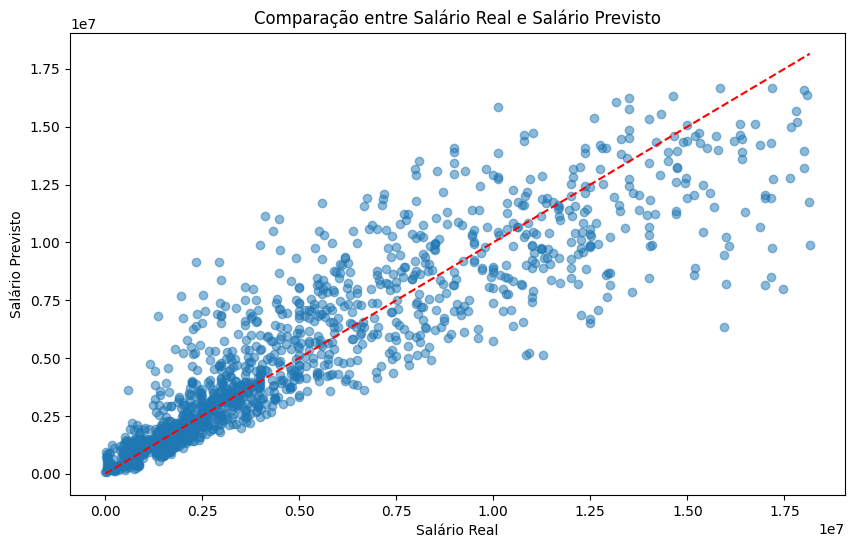

In [200]:
import matplotlib.pyplot as plt

# Comparar salário real com o previsto
plt.figure(figsize=(10, 6))
plt.scatter(df_test['salary'], df_test['predicted_salary'], alpha=0.5)
plt.plot([df_test['salary'].min(), df_test['salary'].max()], [df_test['salary'].min(), df_test['salary'].max()], 'r--')
plt.xlabel('Salário Real')
plt.ylabel('Salário Previsto')
plt.title('Comparação entre Salário Real e Salário Previsto')
plt.show()


### Análise:
O modelo Random Forest apresentou uma boa correlação entre os salários reais e previstos, explicando 81.86% da variabilidade dos dados. No entanto, ele tende a subestimar os salários mais altos, como evidenciado pela dispersão dos pontos acima da linha de regressão ideal. A dispersão dos pontos em torno da linha indica que o modelo captura a tendência geral, mas possui limitações em prever valores extremos.

## Gráfico de Resíduos
Diferença entre os valores reais e as previsões (resíduos) em relação aos valores preditos
Se os resíduos estão distribuídos de forma aleatória em torno de zero, isso indica que o modelo é adequado. Padrões claros, como uma curva, podem indicar underfitting ou que uma relação não linear está faltando.


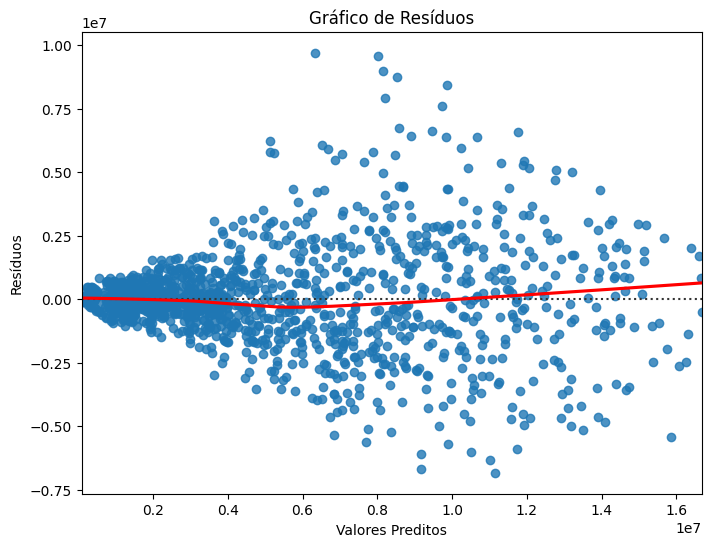

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular os resíduos
residuals = y_test - y_test_pred

# Criar o gráfico de resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()


### Análise:
O gráfico de resíduos mostra que o modelo tem boa precisão para salários mais baixos, mas sua incerteza aumenta à medida que os salários previstos crescem.

A dispersão crescente dos resíduos indica dificuldades do modelo em prever salários mais altos, sugerindo a presença de heterocedasticidade (erros do modelo não são uniformes em todo o intervalo de valores).

Isso indica que ajustes no modelo ou nas features podem melhorar a precisão para valores extremos de salário.

## Histograma dos Resíduos

Mostra a distribuição dos erros (diferença entre o valor predito e o valor real). A distribuição deve ser aproximadamente normal, com uma média próxima de zero.

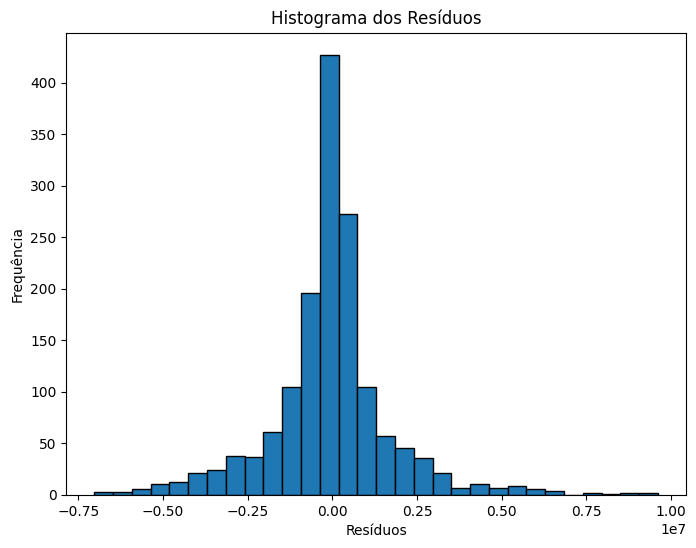

In [202]:
# Plotar o histograma dos resíduos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


### Análise:
O histograma dos resíduos mostra uma distribuição centralizada e aproximadamente normal, indicando que o modelo não possui viés significativo na previsão dos salários.

No entanto, há uma leve assimetria, sugerindo subestimação em alguns casos, além de alguns outliers, onde o modelo teve maior dificuldade em prever corretamente.

## Gráfico de Erro Acumulado

Mostra o erro acumulado entre os valores reais e preditos. Um gráfico com uma linha reta ou acumulando pouco erro sugere um bom modelo, enquanto uma linha que sobe abruptamente sugere um modelo com muitos erros em suas previsões.
Se o erro acumulado aumenta drasticamente, isso indica que o modelo está errando consistentemente em um grupo de dados.


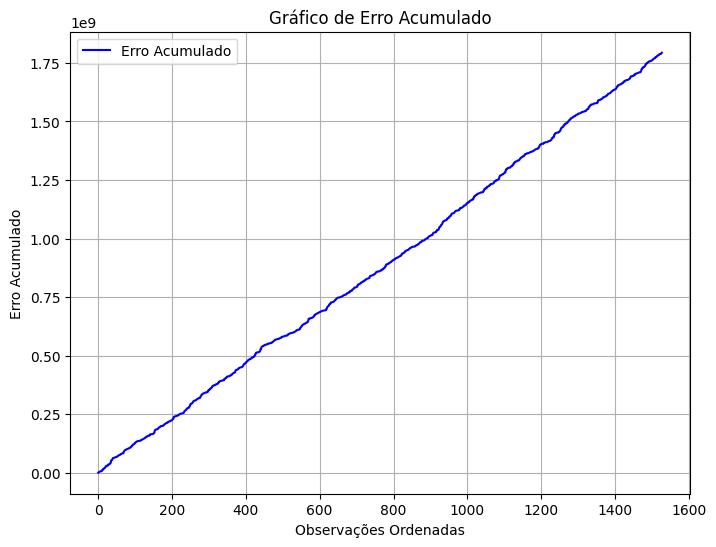

In [205]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que já existam y_test (valores reais) e y_test_pred (valores previstos) do modelo

# Calcular os erros acumulados
errors = np.abs(y_test - y_test_pred)
cumulative_errors = np.cumsum(errors)

# Ordenar os erros para visualização
sorted_errors = np.sort(cumulative_errors)

# Gerar o gráfico de erro acumulado
plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, label='Erro Acumulado', color='b')
plt.title('Gráfico de Erro Acumulado')
plt.xlabel('Observações Ordenadas')
plt.ylabel('Erro Acumulado')
plt.legend()
plt.grid(True)
plt.show()


### Análise
O gráfico de erro acumulado do Random Forest mostra um crescimento linear e constante do erro, indicando que o modelo mantém estabilidade e comete erros de forma uniforme ao longo das previsões. Isso sugere que o modelo é robusto, sem grandes flutuações de erro ou problemas com outliers.

## Conclusão

### Random Forest:

Apresentou um R² de 0.8186, indicando uma boa capacidade de previsão, mas ainda há espaço para melhorias.

O RMSE de 1.82 milhões sugere erros consideráveis nas previsões de salários elevados.

Os gráficos mostram uma correspondência geral entre valores reais e previstos, mas há dispersão significativa para os maiores valores.

# 6 - Seleção e treinamento de modelo - XGBoost


In [208]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# Começar o cronômetro
start_time = time.time()

# Definir X (features) e y (alvo)
X = df_rf[selected_features]
y = df_rf['salary']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os hiperparâmetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.1),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),  # Ajustado para [0.5, 1]
    'colsample_bytree': uniform(0.5, 0.5)  # Ajustado para [0.5, 1]
}

# Criar o modelo XGBoost
xgb = XGBRegressor(random_state=42)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=100,  # Número de combinações a serem testadas
    cv=5,        # Validação cruzada com 5 dobras
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score=np.nan  # Definir erro para NaN, sem crash
)

# Ajustar o modelo e monitorar o progresso
print("Iniciando o ajuste do modelo...")

# Ajustar o modelo
random_search.fit(X_train, y_train)

# Obter o melhor modelo encontrado pelo RandomizedSearchCV
best_model = random_search.best_estimator_
print("Melhor combinação de parâmetros:", random_search.best_params_)

# Fazer previsões nos dados de teste
y_test_pred = best_model.predict(X_test)

# Calcular o erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) no teste: {test_mse}")
print(f"Raiz do erro quadrático médio (RMSE) no teste: {test_rmse}")
print(f"R² no teste: {test_r2}")

# Adicionar as previsões de salário ao dataframe de teste
df_test = df_rf.loc[X_test.index].copy()
df_test['predicted_salary'] = y_test_pred

# Calcular o superfaturamento
df_test['overpaid_amount'] = df_test['salary'] - df_test['predicted_salary']
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['predicted_salary']) * 100

# Exibir os 10 jogadores mais superfaturados
df_superfaturados = df_test.sort_values(by='percentual_superfaturamento', ascending=False)
print(df_superfaturados[['salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].head(10))

# Calcular e exibir o tempo de execução
end_time = time.time()
print(f"Tempo total de execução: {end_time - start_time:.2f} segundos")


Iniciando o ajuste do modelo...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhor combinação de parâmetros: {'colsample_bytree': 0.8248868413213817, 'learning_rate': 0.014805892419703374, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 901, 'subsample': 0.630446811670857}
Erro quadrático médio (MSE) no teste: 3183215455271.335
Raiz do erro quadrático médio (RMSE) no teste: 1784156.7911120746
R² no teste: 0.8261055102278387
          salary  predicted_salary  overpaid_amount  \
5245   762195.00         169531.98        592663.02   
5465   762195.00         241349.80        520845.20   
7122   543471.00         191727.56        351743.44   
7794   757453.00         296076.56        461376.44   
5402   762195.00         321305.91        440889.09   
4388 15944154.00        6740581.00       9203573.00   
5328 11286516.00        5066670.00       6219846.00   
7010   654469.00         296752.19        357716.81   
5502 17469565.00        7988380.50       9481184.50

## XGBoost com melhor combinação de hiperparâmetros

In [209]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Limpeza dos dados
df_xgb = Limpeza().transform(df)

# Lista de features que vão ser usadas
selected_features = [
    'avgPoints',
    'avgFieldGoalsMade',
    'avgFieldGoalsAttempted',
    'points',
    'avgFreeThrowsMade',
    'fieldGoalsMade',
    'avgFreeThrowsAttempted',
    'avgTurnovers',
    'fieldGoalsAttempted',
    'avgMinutes',
    'freeThrowsMade',
    'freeThrowsAttempted',
    'Eficiência Ofensiva',  # Features calculadas
    'Eficiência de Arremesso',
    'Performance Defensiva',
    'Presença em Quadra',
    'performance',
    'rankingSalary'
]

# Definir X (features) e y (alvo)
X = df_xgb[selected_features]
y = df_xgb['salary']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melhor combinação de hiperparâmetros já encontrada para XGBoost
best_params = {
    'colsample_bytree': 0.8248868413213817,
    'learning_rate': 0.014805892419703374,
    'max_depth': 7,
    'min_child_weight': 4,
    'n_estimators': 901,
    'subsample': 0.630446811670857
}

# Criar o modelo XGBRegressor com os melhores parâmetros
xgboost_best = XGBRegressor(
    colsample_bytree=best_params['colsample_bytree'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    random_state=42
)

# Pipeline que já inclui preparação e o modelo XGBRegressor com melhores parâmetros
pipeline = Pipeline(steps=[
    ('preparacao', Preparacao()),  # Supondo que esta etapa já esteja definida
    ('regressor', xgboost_best)
])

# Ajustar o pipeline do modelo nos dados de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_test_pred = pipeline.predict(X_test)

# Calcular o erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Calcular RMSE
test_r2 = r2_score(y_test, y_test_pred)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) no teste: {test_mse}")
print(f"Raiz do erro quadrático médio (RMSE) no teste: {test_rmse}")
print(f"R² no teste: {test_r2}")

# Adicionar as previsões de salário ao dataframe de teste
df_test = df_xgb.loc[X_test.index].copy()
df_test['predicted_salary'] = y_test_pred

# Calcular o superfaturamento
df_test['overpaid_amount'] = df_test['salary'] - df_test['predicted_salary']
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['predicted_salary']) * 100

# Exibir os 10 jogadores mais superfaturados
df_superfaturados = df_test.sort_values(by='percentual_superfaturamento', ascending=False)
print(df_superfaturados[['salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].head(10))


Erro quadrático médio (MSE) no teste: 3194922742628.1265
Raiz do erro quadrático médio (RMSE) no teste: 1787434.682059215
R² no teste: 0.8254659579291862
          salary  predicted_salary  overpaid_amount  \
5245   762195.00          96713.41        665481.59   
7122   543471.00         140936.81        402534.19   
5465   762195.00         255873.33        506321.67   
7794   757453.00         291641.91        465811.09   
7010   654469.00         266199.09        388269.91   
5402   762195.00         313037.19        449157.81   
4388 15944154.00        6707231.50       9236922.50   
5328 11286516.00        5046764.00       6239752.00   
6972  1312611.00         605793.31        706817.69   
5502 17469565.00        8184493.50       9285071.50   

      percentual_superfaturamento  
5245                       688.10  
7122                       285.61  
5465                       197.88  
7794                       159.72  
7010                       145.86  
5402                    

## Calcular o percentual de superfaturamento


In [210]:
df_test['percentual_superfaturamento'] = (df_test['overpaid_amount'] / df_test['salary']) * 100

# Exibir as primeiras linhas para verificar o percentual de superfaturamento
df_test_sorted = df_test[['name', 'salary', 'predicted_salary', 'overpaid_amount', 'percentual_superfaturamento']].sort_values(by='percentual_superfaturamento', ascending=False)

# Exibir as primeiras linhas
print(df_test_sorted.head())


                         name    salary  predicted_salary  overpaid_amount  \
5245          Samardo Samuels 762195.00          96713.41        665481.59   
7122     Nicolas Laprovittola 543471.00         140936.81        402534.19   
5465            Isaiah Thomas 762195.00         255873.33        506321.67   
7794           Oshae Brissett 757453.00         291641.91        465811.09   
7010  Timothe Luwawu-Cabarrot 654469.00         266199.09        388269.91   

      percentual_superfaturamento  
5245                        87.31  
7122                        74.07  
5465                        66.43  
7794                        61.50  
7010                        59.33  


## Ordenar os jogadores mais superfaturados e exibir os 10 mais superfaturados

In [211]:
# 11. Ordenar os jogadores mais superfaturados
overpaid_players = df_test[['name', 'positionId', 'salary', 'predicted_salary', 'overpaid_amount', 'performance', 'year', 'percentual_superfaturamento']].sort_values(by='overpaid_amount', ascending=False)

# 12. Exibir os 10 jogadores mais superfaturados
print("Jogadores mais superfaturados:")
overpaid_players.head(10)


Jogadores mais superfaturados:


,name,positionId,salary,predicted_salary,overpaid_amount,performance,year,percentual_superfaturamento
5502,Tristan Thompson,Center,17469565.00,8184493.50,9285071.50,677.96,2018,53.15
4388,Ian Mahinmi,Center,15944154.00,6707231.50,9236922.50,351.84,2017,57.93
6516,Spencer Dinwiddie,Point Guard,17142857.00,8171162.00,8971695.00,57.31,2021,52.33
5513,Bismack Biyombo,Center,17000000.00,8084437.50,8915562.50,946.54,2018,52.44
7588,Duncan Robinson,Forward,18154000.00,9510534.00,8643466.00,418.19,2023,47.61
5334,Timofey Mozgov,Center,16000000.00,7620198.00,8379802.00,816.96,2016,52.37
3017,Luol Deng,Forward,17190000.00,8974083.00,8215917.00,916.91,2017,47.79
6161,Gorgui Dieng,Center,15170787.00,8220512.00,6950275.00,840.12,2018,45.81
6475,Aaron Gordon,Power Forward,18136364.00,11543698.00,6592666.00,1276.40,2020,36.35
6065,Miles Plumlee,Center,12500000.00,5967084.00,6532916.00,570.69,2018,52.26


## Curva de Previsão vs Real
Mostra os valores reais contra os valores previstos pelo modelo. Idealmente, todos os pontos devem estar próximos da linha y = x, indicando que o modelo faz boas previsões

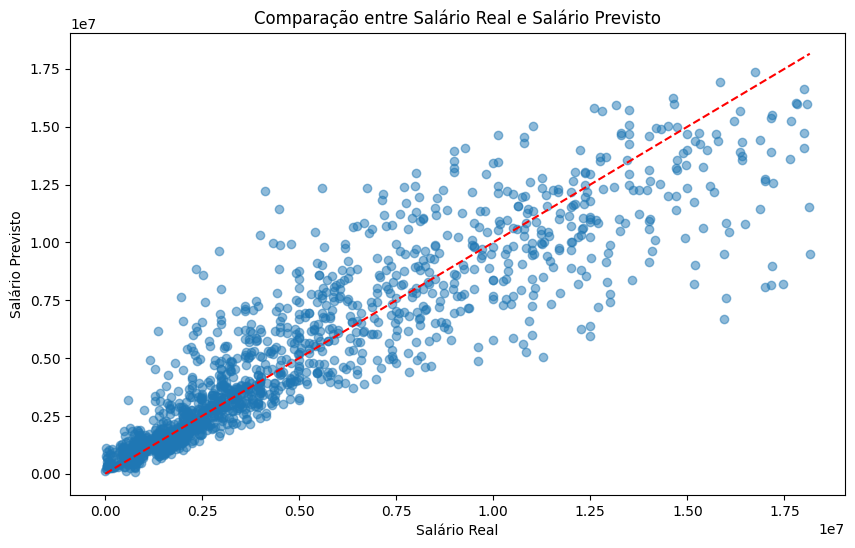

In [212]:
import matplotlib.pyplot as plt

# Comparar salário real com o previsto
plt.figure(figsize=(10, 6))
plt.scatter(df_test['salary'], df_test['predicted_salary'], alpha=0.5)
plt.plot([df_test['salary'].min(), df_test['salary'].max()], [df_test['salary'].min(), df_test['salary'].max()], 'r--')
plt.xlabel('Salário Real')
plt.ylabel('Salário Previsto')
plt.title('Comparação entre Salário Real e Salário Previsto')
plt.show()


### Análise:
O gráfico mostra que o modelo de previsão de salários tem bom desempenho para salários mais baixos, com previsões próximas aos valores reais.

No entanto, há maior dispersão para salários mais altos, indicando menor precisão nessas faixas. O modelo tende a subestimar salários mais elevados e, ocasionalmente, superestima salários mais baixos.










## Gráfico de Resíduos
Diferença entre os valores reais e as previsões (resíduos) em relação aos valores preditos.
Se os resíduos estão distribuídos de forma aleatória em torno de zero, isso indica que o modelo é adequado. Padrões claros, como uma curva, podem indicar underfitting ou que uma relação não linear está faltando.


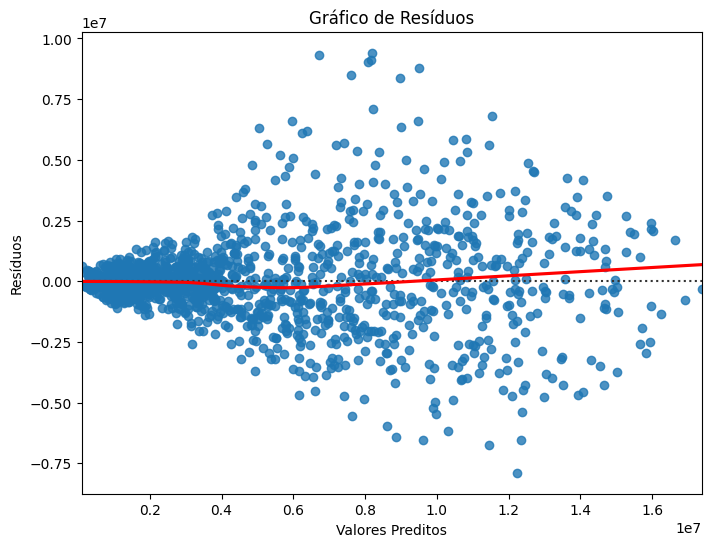

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular os resíduos
residuals = y_test - y_test_pred

# Criar o gráfico de resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()


### Análise:
O gráfico de resíduos mostra uma leve tendência não linear, com o modelo apresentando maior erro para salários mais altos, indicando que ele não captura completamente a complexidade dos dados. Além disso, observa-se heterocedasticidade (erros do modelo não são uniformes em todo o intervalo de valores), com a dispersão dos resíduos aumentando à medida que os valores previstos crescem, sugerindo inconsistência nos erros do modelo para diferentes faixas de salário.

## Histograma dos Resíduos

Mostra a distribuição dos erros (diferença entre o valor predito e o valor real). A distribuição deve ser aproximadamente normal, com uma média próxima de zero.

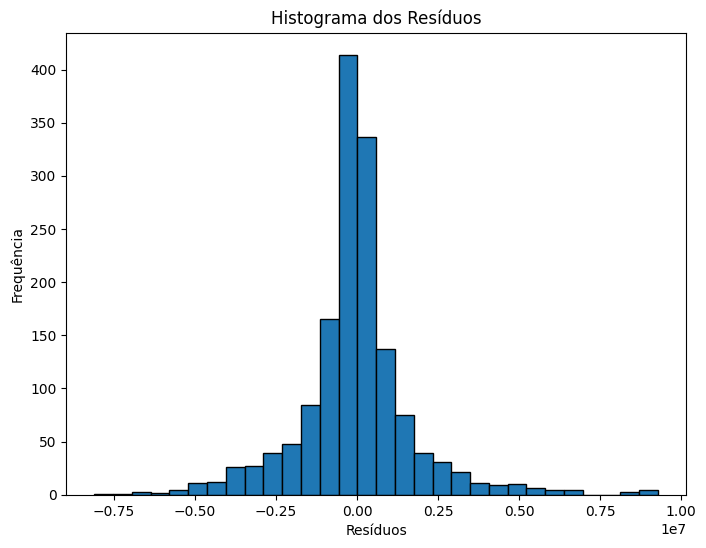

In [214]:
# Plotar o histograma dos resíduos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


### Análise:
O histograma dos resíduos mostra uma distribuição aproximadamente normal, centrada em torno de zero, o que indica que, em média, o modelo não está superestimando nem subestimando os salários.

No entanto, há uma leve assimetria nas caudas, o que pode sugerir que o modelo apresenta alguns erros maiores em determinadas previsões.

Apesar disso, a maior parte dos resíduos está concentrada perto de zero, o que é um bom sinal de que o modelo está funcionando bem na maioria dos casos.








## Gráfico de Erro Acumulado

Mostra o erro acumulado entre os valores reais e preditos. Um gráfico com uma linha reta ou acumulando pouco erro sugere um bom modelo, enquanto uma linha que sobe abruptamente sugere um modelo com muitos erros em suas previsões.
Se o erro acumulado aumenta drasticamente, isso indica que o modelo está errando consistentemente em um grupo de dados.


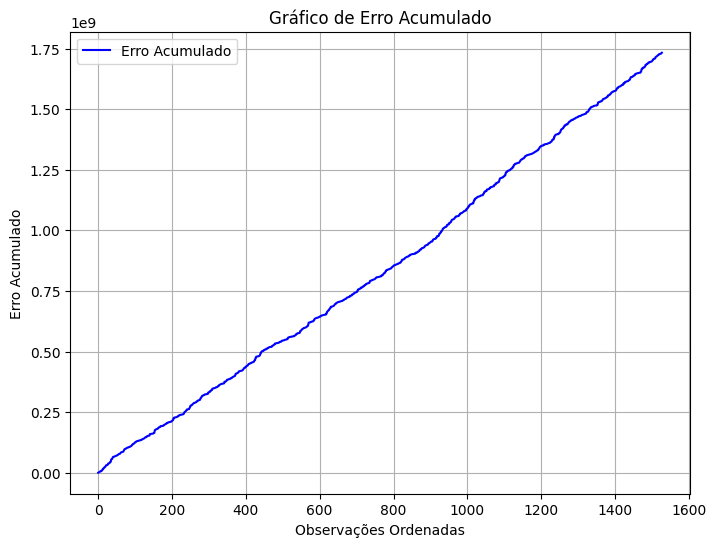

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que já existam y_test (valores reais) e y_test_pred (valores previstos) do modelo

# Calcular os erros acumulados
errors = np.abs(y_test - y_test_pred)
cumulative_errors = np.cumsum(errors)

# Ordenar os erros para visualização
sorted_errors = np.sort(cumulative_errors)

# Gerar o gráfico de erro acumulado
plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, label='Erro Acumulado', color='b')
plt.title('Gráfico de Erro Acumulado')
plt.xlabel('Observações Ordenadas')
plt.ylabel('Erro Acumulado')
plt.legend()
plt.grid(True)
plt.show()


### Análise
O gráfico de erro acumulado apresenta um aumento constante ao longo das observações ordenadas, o que indica que os erros de previsão se acumulam de maneira regular à medida que novas observações são adicionadas.

Isso sugere que o modelo comete erros consistentes, sem grandes saltos ou quedas abruptas, mas que os erros acumulados se distribuem uniformemente entre as observações.










## Ajuste do modelo

Para reduzir o overfitting, foi reduzida a max_depth, para reduzir a complexidade do modelo.
Também foram aumentados os parâmetros min_samples_split e min_samples_leaf, para evitar que o modelo criasse divisões muito específicas e capturasse ruído dos dados.

Para reduzir o overfitting, foi reduzida a max_depth, para reduzir a complexidade do modelo.
Também foram aumentados os parâmetros min_samples_split e min_samples_leaf, para evitar que o modelo criasse divisões muito específicas e capturasse ruído dos dados.

## Conclusão

### XGBoost:

 Apresentou um desempenho satisfatório, com um R² de 0.825, o que indica que ele explica 82.5% da variabilidade do salário dos jogadores.

 O erro médio (RMSE) foi elevado, cerca de 1.78 milhões, refletindo que há uma margem de erro significativa nas previsões, especialmente em salários mais altos.

 O gráfico de resíduos sugere alguma heterocedasticidade, com maiores desvios em previsões de salários elevados.

 No geral, o modelo captura bem a tendência dos dados, mas ainda há margem para mais ajustes.

# Conclusão final

Entre os três modelos, o **XGBoost** apresentou o melhor desempenho, com um R² de 0.825 e RMSE de 1.78 milhões, indicando que explica 82.5% da variabilidade dos salários, mas com margem de erro significativa para valores altos.

O **Random Forest** também teve uma boa performance, com R² de 0.8186 e RMSE de 1.82 milhões, mas com erros maiores em previsões de salários elevados.

A **Regressão Linear** teve o pior desempenho, com R² de 0.71 e RMSE de 2.3 milhões, falhando em capturar as complexidades dos dados, especialmente nos maiores salários.